# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Загрузим библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.

Изучим общую информацию о полученном датафрейме:

In [2]:


data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t') 
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Oзнакамимся с содержанием датафрейма. Создаем опцию на вывод до 30 колонок.

In [3]:
pd.options.display.max_columns=30
data.head(10) # 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Построим гистограмму для всех числовых столбцов таблицы на одном графике:

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

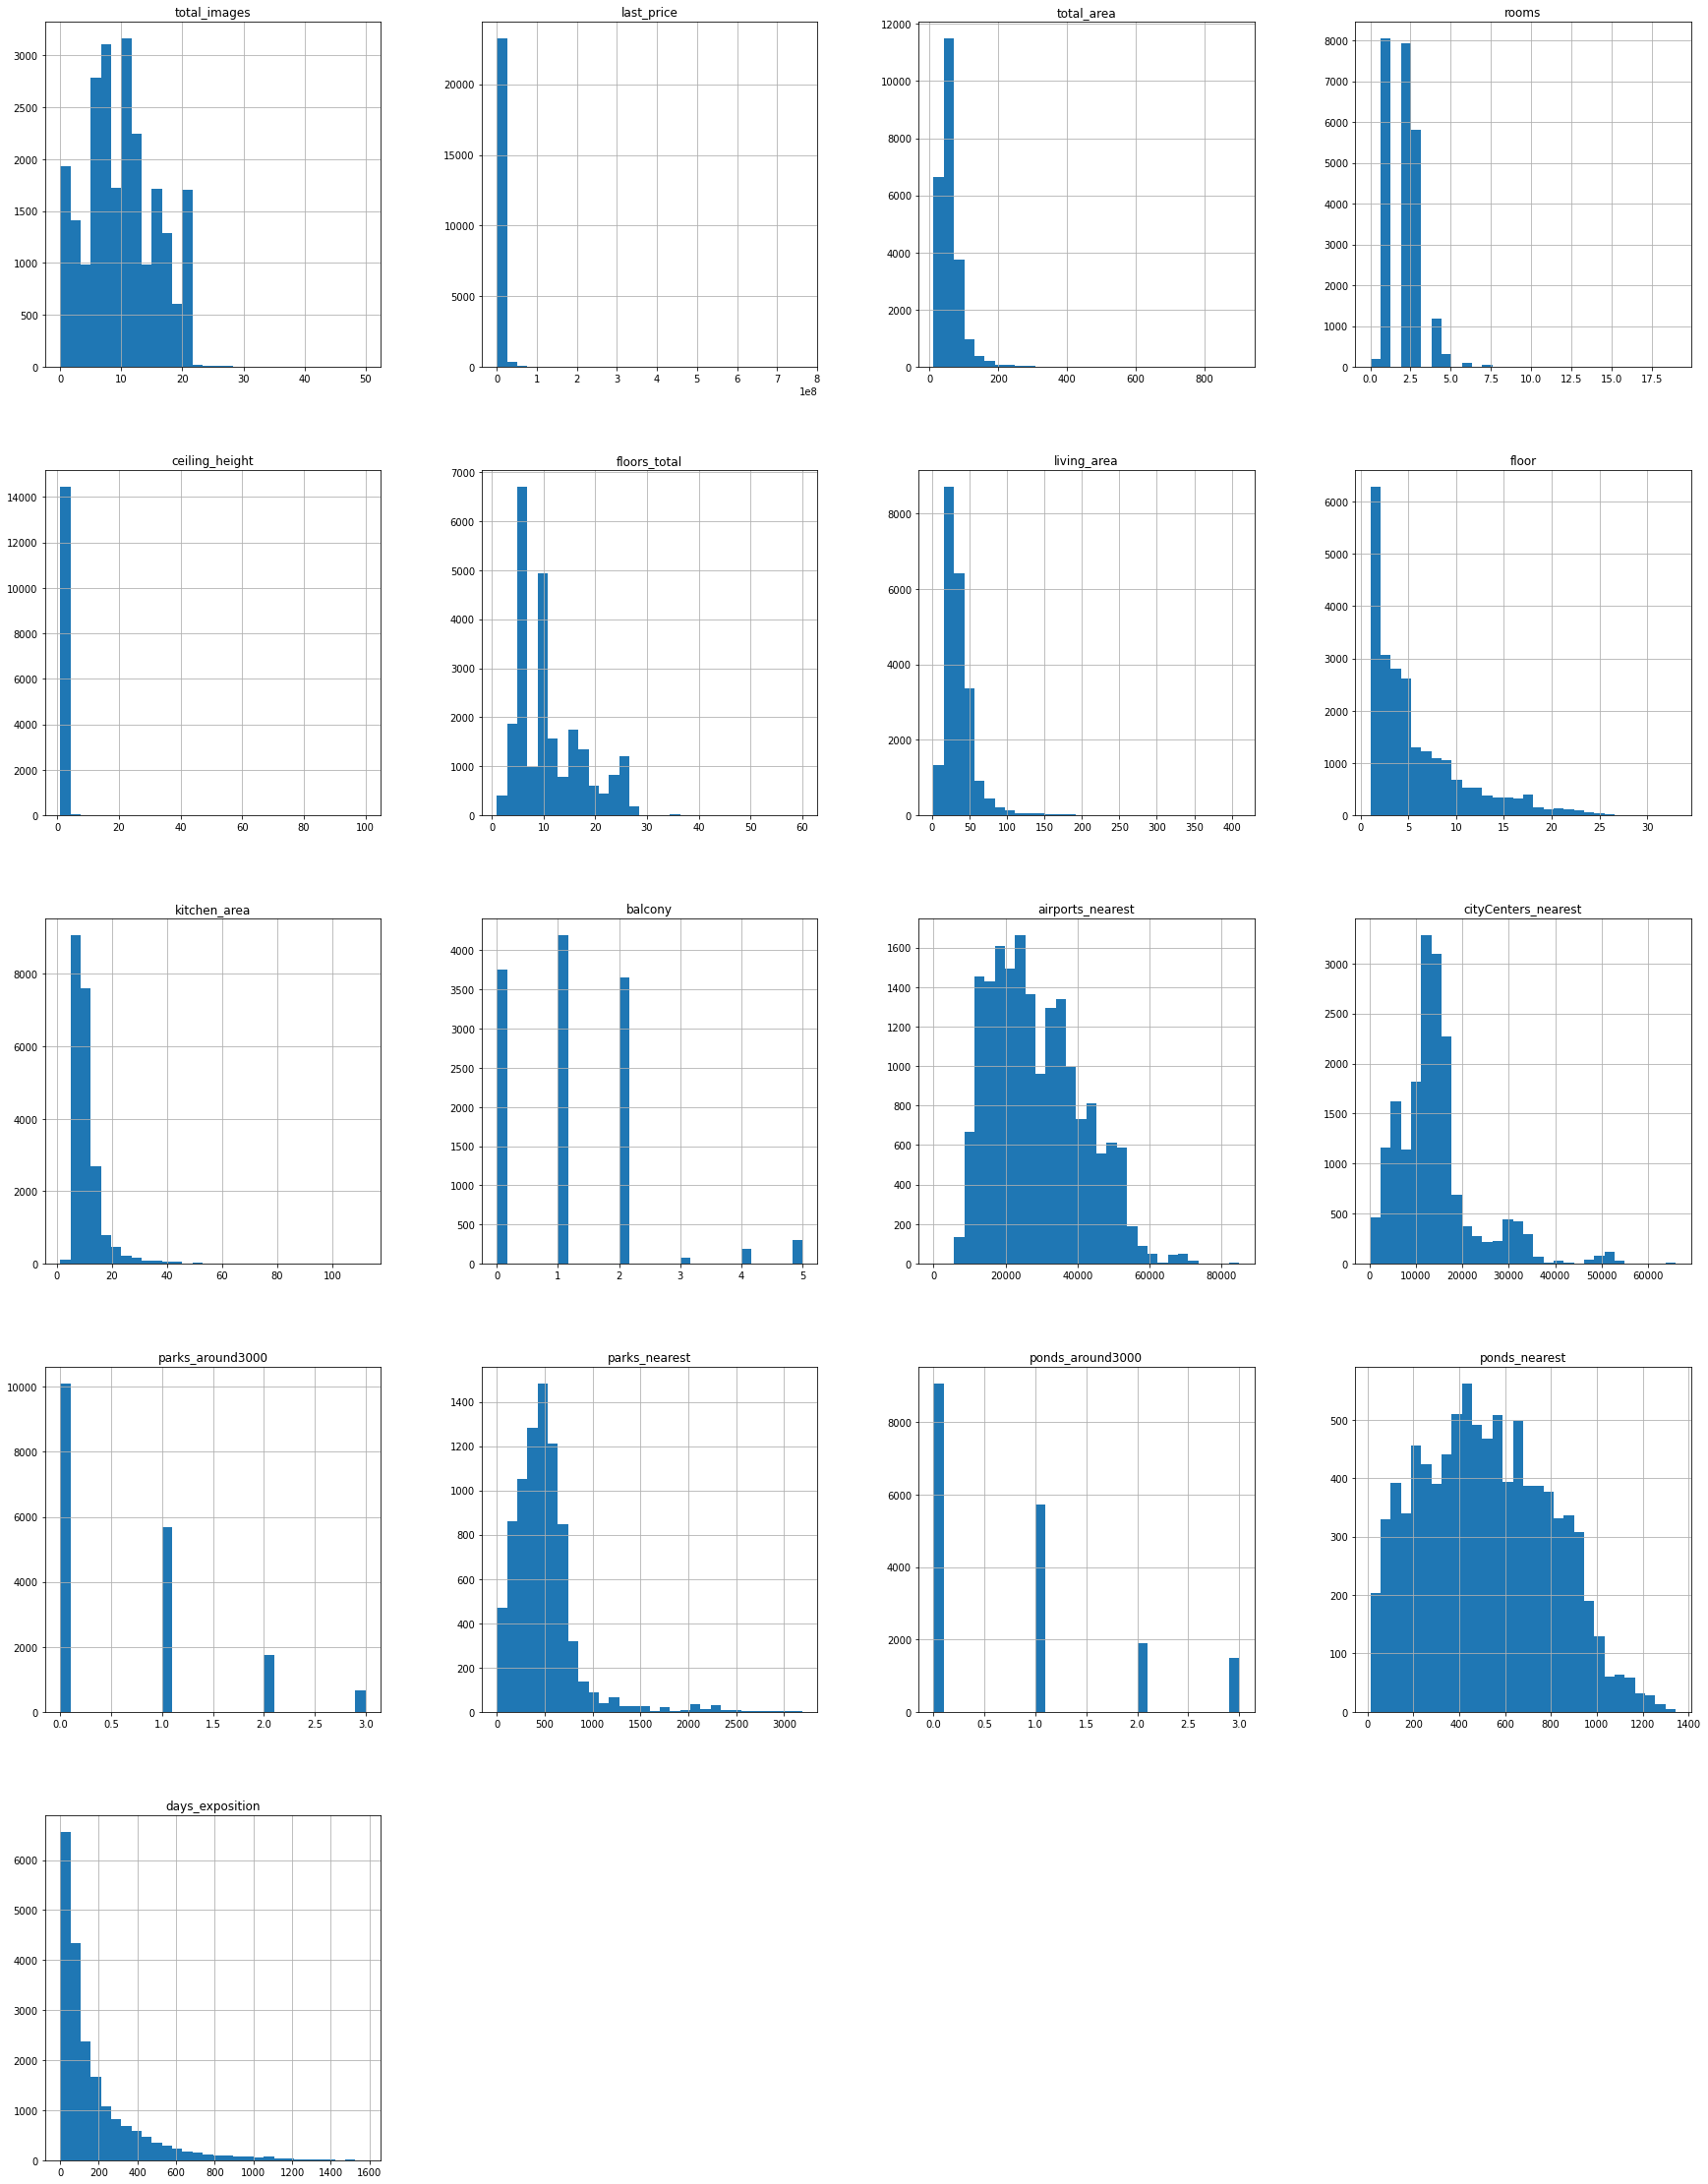

In [4]:
data.hist(bins = 30, figsize=(30,40))

Характеристики по столбцам:

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Краткое описание DataFrame**


DataFrame состоит из 23 699 строк и 22 колонок , из которых  2 -bool, 14- float64, 3 int64,3- object.

Количество пропусков 49 до 15620. Без пропусков 8 колонок.



### Предобработка данных

Определим, в каких столбцах есть пропуски:

In [6]:
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Доля пропусков:

In [7]:
pd.DataFrame(round(data.isna().mean()*100,1)) 

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


Посмотрим как распределяются населенные пункты по количеству объявлений:

In [8]:
data['locality_name'].value_counts().head(30)

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Тосно                        104
Кингисепп                    104
Кронштадт                     96
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
посёлок Бугры                 69
посёлок Металлострой          66
Name: loca

**Большая часть - примерно 66% - это объявления в Санкт- Петербурге.**

Построим корреляцию по всему data:

In [9]:
data_corr = data.corr() 
data_corr.style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,nan,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,nan,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


**Заполним пропущенные значения там, где это возможно:**

Заполним пропуски в столбце ```kitchen_area``` :

заполняется как средний коэффициент отношения  площади кухни к общей площади, умноженный на общую площадь.

In [10]:
data['kitchen_area'] = data['kitchen_area'].fillna(((data['kitchen_area']/data['total_area']).mean())*data['total_area'])

Заполним пропуски в столбце ```living_area``` :

заполняется как средний коэффициент отношения жилой площади  к общей площади, умноженный на общую площадь.

In [11]:
data['living_area'] = data['living_area'].fillna(((data['living_area']/data['total_area']).mean())*data['total_area'])

Заменим пропуски в столбце balcony на 0 (т.к. логично предположить, что если продавец не указал их число, то, скорее всего, их нет).

In [12]:
data['balcony'] = data['balcony'].fillna(0)


Заменим пропуски в столбце is_apartment на False - вероятно, пользователь не указывал этот параметр, т.к. считал объект жилым помещением.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Посмотрим в каких в основном населенных пунктах пропуски по столбцам ```airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest```:

In [14]:
data.loc[data['airports_nearest'].isna(),'locality_name'].value_counts().head(30)

посёлок Мурино               522
Всеволожск                   398
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Кириши                       125
Сланцы                       112
Волхов                       111
Тосно                        104
Кингисепп                    104
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Санкт-Петербург               85
Кировск                       84
Отрадное                      80
посёлок Бугры                 69
Приозерск                     66
деревня Старая                64
городской посёлок Янино-1     61
Шлиссельбург                  57
Луга                          56
Тихвин                        49
поселок Бугры                 45
посёлок Тельмана              39
поселок Романовка             36
Волосово                      36
Name: loca

In [15]:
data.loc[data['cityCenters_nearest'].isna(),'locality_name'].value_counts().head(30)

посёлок Мурино               522
Всеволожск                   398
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Кириши                       125
Сланцы                       112
Волхов                       111
Тосно                        104
Кингисепп                    104
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
посёлок Бугры                 69
Приозерск                     66
деревня Старая                64
городской посёлок Янино-1     61
Санкт-Петербург               61
Шлиссельбург                  57
Луга                          56
Тихвин                        49
поселок Бугры                 45
посёлок Тельмана              39
поселок Романовка             36
Волосово                      36
Name: loca

In [16]:
data.loc[data['parks_around3000']==0.0,'locality_name'].value_counts().head(30)

Санкт-Петербург            8380
посёлок Шушары              436
посёлок Парголово           317
Колпино                     204
Пушкин                      157
Красное Село                130
Ломоносов                   116
Сестрорецк                  111
посёлок Металлострой         66
Петергоф                     58
посёлок Стрельна             25
посёлок Понтонный            20
Павловск                     12
Кронштадт                     8
Зеленогорск                   8
посёлок Сапёрный              6
посёлок Молодёжное            5
посёлок Песочный              4
посёлок Репино                4
посёлок Александровская       2
поселок Мурино                2
посёлок Лисий Нос             2
посёлок Усть-Ижора            2
посёлок Петро-Славянка        1
посёлок Белоостров            1
посёлок Щеглово               1
посёлок Левашово              1
поселок Лисий Нос             1
Name: locality_name, dtype: int64

In [17]:
data.loc[data['parks_nearest'].isna(),'locality_name'].value_counts().head(30)

Санкт-Петербург            8437
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
посёлок Парголово           317
Гатчина                     307
деревня Кудрово             299
Выборг                      237
Колпино                     205
Кудрово                     173
Пушкин                      157
деревня Новое Девяткино     144
Сертолово                   142
Красное Село                132
Кириши                      125
Ломоносов                   117
Сланцы                      112
Волхов                      111
Сестрорецк                  111
Кингисепп                   104
Тосно                       104
Никольское                   93
Коммунар                     89
Сосновый Бор                 87
Кировск                      84
Отрадное                     80
посёлок Бугры                69
посёлок Металлострой         66
Приозерск                    66
деревня Старая               64
Name: locality_name, dtype: int64

In [18]:
data.loc[data['ponds_around3000']==0.0,'locality_name'].value_counts().head(30)

Санкт-Петербург         7677
посёлок Шушары           284
посёлок Парголово        271
Пушкин                   192
Красное Село             166
Колпино                  147
Петергоф                  84
посёлок Металлострой      66
Ломоносов                 49
Сестрорецк                48
посёлок Стрельна          20
посёлок Понтонный         13
Кронштадт                  8
Зеленогорск                6
посёлок Молодёжное         5
Павловск                   4
посёлок Песочный           4
посёлок Репино             4
посёлок Лисий Нос          2
посёлок Усть-Ижора         2
посёлок Щеглово            1
посёлок Левашово           1
поселок Лисий Нос          1
Name: locality_name, dtype: int64

In [19]:
data.loc[data['ponds_nearest'].isna(),'locality_name'].value_counts().head(30)

Санкт-Петербург              7738
посёлок Мурино                522
Всеволожск                    398
Гатчина                       307
деревня Кудрово               299
посёлок Шушары                288
посёлок Парголово             271
Выборг                        237
Пушкин                        192
Кудрово                       173
Красное Село                  168
Колпино                       148
деревня Новое Девяткино       144
Сертолово                     142
Кириши                        125
Сланцы                        112
Волхов                        111
Кингисепп                     104
Тосно                         104
Никольское                     93
Коммунар                       89
Сосновый Бор                   87
Петергоф                       84
Кировск                        84
Отрадное                       80
посёлок Бугры                  69
Приозерск                      66
посёлок Металлострой           66
деревня Старая                 64
городской посё

1) В столбцах ```airports_nearest и cityCenters_nearest``` бОльшая часть пропусков  не в Санкт- Петербурге.Данных для замены из других столбцов не имеется. Замена нецелесообразна. Пропуски оставляем.

2) В  столбцах ```parks_nearest и parks_around3000/ ponds_around3000 и ponds_nearest```   населенные пункты практически совпадают. Данных для замены из других столбцов не имеется. Замена нецелесообразна. Пропуски оставляем

3) Для остальных  оставшихся столбцов с пропусками также данных для замены из других столбцов не имеется. Замена нецелесообразна. Пропуски оставляем


***Итого*** 

**Для остальных  оставшихся столбцов с пропусками - пропуски оставляем.**



Удаляем строки с пустыми строками  в столбцах ```floors_total,locality_name``` их небольшое количество. Неопределенно чем можно заполнить. Проверим изменение - количество строк.

In [20]:
data =data.dropna(subset=['floors_total','locality_name']) 
data.shape[0]

23565

In [21]:
# прoверим изменения
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Причины, которые могли привести к пропускам в данных: 

1) Человеческий фактор -клиенты(пользователи) могли не внести нужные данные;

2) Фактическое отстутствие этих данных ;

3) Тех. сбой при внесении данных в таблицу. Проблемы могли возникнуть на этапе загрузки и на этапе выгрузки данных. Неправильный запрос, объединение таблиц;

4) Несоответствие типов при внесении новых данных.



Рассмотрим  типы данных в каждом столбце:

In [22]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Находим столбцы, в которых нужно изменить тип данных - is_apartment и first_day_exposition:

```is_apartment``` меняем на ```bool```

```first_day_exposition```  меняем на ```datetime64```.

проверяем изменения

In [23]:
data['is_apartment'] = data['is_apartment'].astype(bool)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

data.dtypes


total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Почему нужно изменить тип данных: для последующего анализа и работы со столбцом.

Изучим уникальные значения в столбце с названиями в locality_name. Посчитаем количество уникальных значений.

In [24]:
display(data['locality_name'].unique())
(len(data['locality_name'].unique()))

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

364

Устраняем неявные дубликаты:

попробуем заменить посредством замены ```ё``` на ```е``` и ```поселок городского типа``` на ```поселок```

In [25]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace('посёлок', 'поселок', regex=True)
) 
data['locality_name'] = (
    data['locality_name']
    .str.replace('поселок городского типа', 'поселок')
    .replace('поселок городского типа', 'поселок', regex=True)
) 
print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор'
 'Гатчина' 'деревня Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой' 'поселок Лебяжье'
 'поселок Сиверский' 'поселок Молодцово' 'поселок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок Бугры' 'поселок Рощино' 'Кириши'
 'Луга' 

т.к. остались дубликаты -  применим функцию , чтобы остались только названия населенных пунктов. Создаем столбец locality_name_2. Проверяем количество уникальных значений. Количество снизилось с 364 до 305.

In [26]:
def new_name(n):
    for t in range(len(n)):
        if n[t].isupper()==True:
            return n[t:len(n)]

data['locality_name_2'] = data['locality_name'].apply(new_name)
        
display(data['locality_name_2'].unique())
(len(data['locality_name_2'].unique()))

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

305

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра.(до 2х знаков после запятой).
Меняем тип на float

In [27]:
data['one_square_price'] = round((data['last_price']/data['total_area']),2)
data['one_square_price'] = pd.to_numeric(data['one_square_price'])
data['one_square_price'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: one_square_price, dtype: float64

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее):

In [28]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data[{'first_day_exposition','weekday_exposition'}].head()

,weekday_exposition,first_day_exposition
0,3,2019-03-07
1,1,2018-12-04
2,3,2015-08-20
3,4,2015-07-24
4,1,2018-06-19


месяц публикации объявления:

In [29]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data[{'first_day_exposition','month_exposition'}].head()

,first_day_exposition,month_exposition
0,2019-03-07,3
1,2018-12-04,12
2,2015-08-20,8
3,2015-07-24,7
4,2018-06-19,6


год публикации объявления:

In [30]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
data[{'first_day_exposition','year_exposition'}].head()

,year_exposition,first_day_exposition
0,2019,2019-03-07
1,2018,2018-12-04
2,2015,2015-08-20
3,2015,2015-07-24
4,2018,2018-06-19


тип этажа квартиры (значения — «первый», «последний», «другой»):

In [31]:
def floor_type (data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['apartment_floor_type'] = data.apply(floor_type,axis=1)
data['apartment_floor_type'].head(15)

0        другой
1        первый
2        другой
3        другой
4        другой
5        другой
6        другой
7        другой
8        другой
9        другой
10       другой
11       другой
12    последний
13    последний
14       первый
Name: apartment_floor_type, dtype: object

расстояние до центра города в километрах (переводим из м в км и округляем до ближайших целых значений):

In [32]:
data['cityCenters_nearest_KM'] = (data['cityCenters_nearest']/1000).round()
data['cityCenters_nearest_KM'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: cityCenters_nearest_KM, dtype: float64

### Проведите исследовательский анализ данных

**4.1 Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров.**

**Oбщая площадь**

Создаем гистограмму и диаграмму размаха.

<AxesSubplot:>

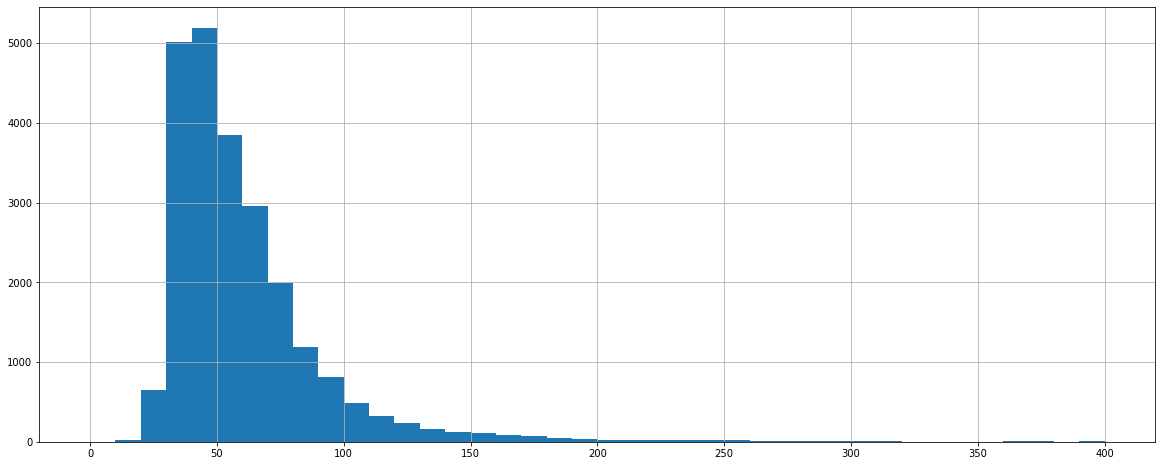

In [33]:
data['total_area'].hist(bins=40, range=(0,400), figsize=(20,8))

<AxesSubplot:>

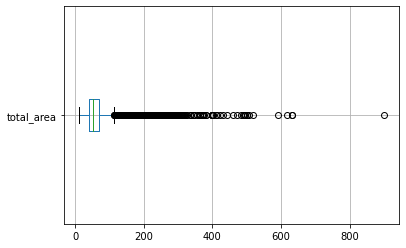

In [34]:

data.boxplot('total_area', vert=False)

Категоризируем показатели

In [35]:
def new_total_area(t_area):
    try:
        if t_area <= 20.00:
            return '<=20.00'
        elif 20.01 <= t_area <= 50.00:
            return '20.01-50.00'
        elif 50.01 <= t_area <= 100.00:
            return '50.01-100.00'
        elif 100.01 <= t_area <= 150.00:
            return '100.01-150.00'
        elif 150.01 <= t_area <= 200.00:
            return '150.01-200.00'
        elif 200.01 <= t_area <= 240.00:
            return '200.01-240.00'
        elif 240.01 <= t_area <= 300.00:
            return '240.01-300.00'
        elif 300.01 <=t_area <=350.00:
            return '300.01-350.00'
        elif t_area >= 350.01:
            return '>=350.01'
    except:
        pass

new_total_area_category = data['total_area'].apply(new_total_area) 
new_total_area_category.value_counts()

20.01-50.00      11130
50.01-100.00     10580
100.01-150.00     1259
150.01-200.00      335
200.01-240.00       98
240.01-300.00       67
>=350.01            41
<=20.00             35
300.01-350.00       20
Name: total_area, dtype: int64

In [36]:
#удаляем редкие и выбивающиеся значения - свыше 200 кв. м. и менее 20 кв.м.
# пока не запускаем, чтобы не нарушать гистограммы последующих параметров.
#data = data[(data['total_area']<=200)&(data['total_area']>20)]
#data

**Жилая площадь**

Создаем гистограмму и диаграмму размаха.

<AxesSubplot:>

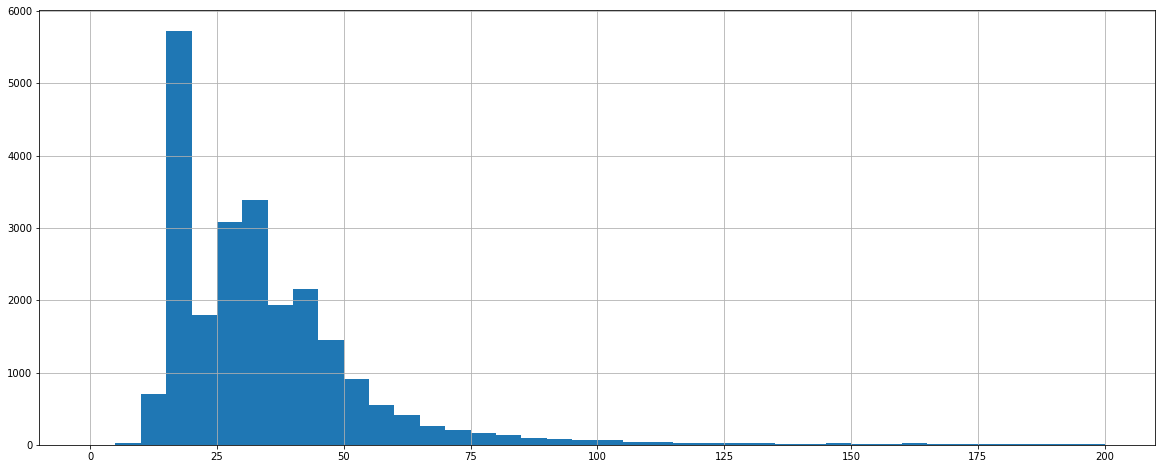

In [37]:
data['living_area'].hist(bins=40, range=(0,200), figsize=(20,8))

<AxesSubplot:>

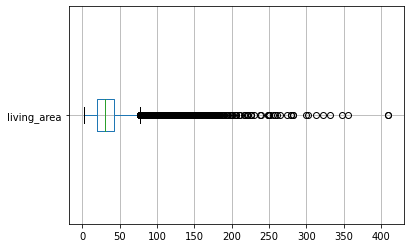

In [38]:
data.boxplot('living_area', vert=False)

Категоризируем показатели

In [39]:
def new_living_area(L_area):
    try:
        if L_area <= 10.00:
            return '<=10.00'
        elif 10.01 <= L_area <= 25.00:
            return '10.01-25.00'
        elif 25.01 <= L_area <= 50.00:
            return '25.01-50.00'
        elif 50.01 <= L_area <= 75.00:
            return '50.01-75.00'
        elif 75.01 <= L_area <= 100.00:
            return '75.01-100.00'
        elif 100.01 <= L_area <= 120.00:
            return '100.01-120.00'
        elif 120.01 <= L_area <= 140.00:
            return '120.01-140.00'
        elif 140.01 <=L_area <=175.00:
            return '140.01-175.00'
        elif L_area >= 175.01:
            return '>=175.01'
    except:
        pass
new_living_area_category = data['living_area'].apply(new_living_area) 
new_living_area_category.value_counts()

25.01-50.00      12030
10.01-25.00       8307
50.01-75.00       2233
75.01-100.00       541
100.01-120.00      150
140.01-175.00       90
>=175.01            77
120.01-140.00       75
<=10.00             62
Name: living_area, dtype: int64

In [40]:
#удаляем редкие и выбивающиеся значения - менее 10 кв. м. и свыше 120 кв. м. 
# пока не запускаем, чтобы не нарушать гистограммы последующих параметров.
#data = data[(data['living_area']<=120)&(data['living_area']>10)]
#data

**Площадь кухни**

Создаем гистограмму и диаграмму размаха.

<AxesSubplot:>

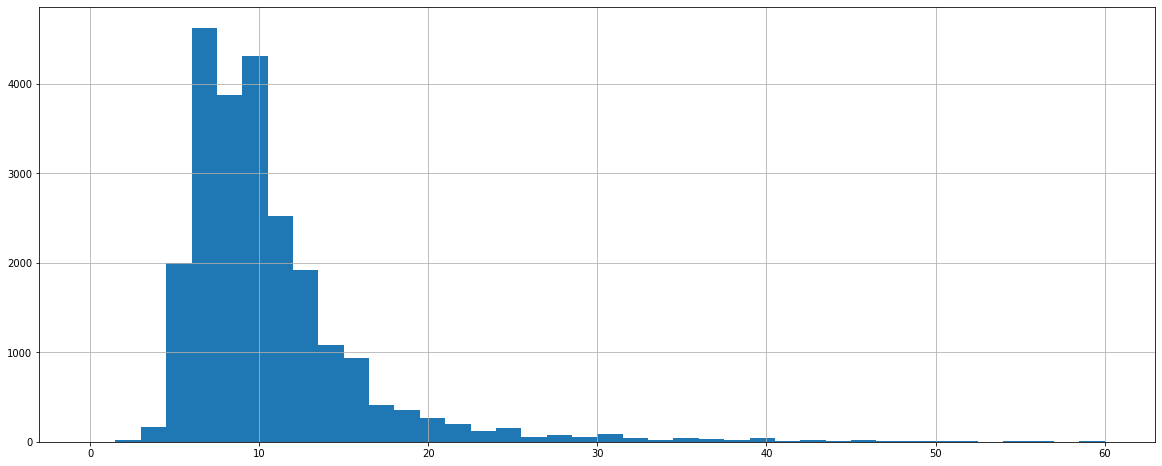

In [41]:
data['kitchen_area'].hist(bins =40,range=(0,60), figsize=(20,8))

<AxesSubplot:>

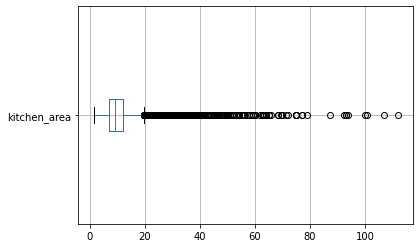

In [42]:
data.boxplot('kitchen_area', vert=False)

Категоризируем показатели

In [43]:
def new_kitchen_area(k_area):
    try:
        if k_area <= 4.00:
            return '<=4.00'
        elif 4.01 <= k_area <= 10.00:
            return '4.01-10.00'
        elif 10.01 <= k_area <= 20.00:
            return '19.01-20.00'
        elif 20.01 <= k_area <= 30.00:
            return '20.01-30.00'
        elif 30.01 <= k_area <= 40.00:
            return '30.01-40.00'
        elif 40.01 <= k_area <= 50.00:
            return '40.01-50.00'
        elif k_area >= 50.01:
            return '>=50.01'
    except:
        pass

new_kitchen_area_category = data['kitchen_area'].apply(new_kitchen_area) 
new_kitchen_area_category.value_counts()

4.01-10.00     14152
19.01-20.00     8165
20.01-30.00      781
30.01-40.00      215
40.01-50.00       94
<=4.00            91
>=50.01           62
Name: kitchen_area, dtype: int64

In [44]:
#удаляем редкие и выбивающиеся значения - менее 4 кв. м. и свыше 30 кв. м. 
# пока не запускаем, чтобы не нарушать гистограммы последующих параметров.
#data = data[(data['kitchen_area']<=30)&(data['kitchen_area']>4)]
#data

**Цена объекта**

Создаем гистограмму с показателем цена на момент снятия с публикации (тыс. руб.) и диаграмму размаха.

<AxesSubplot:>

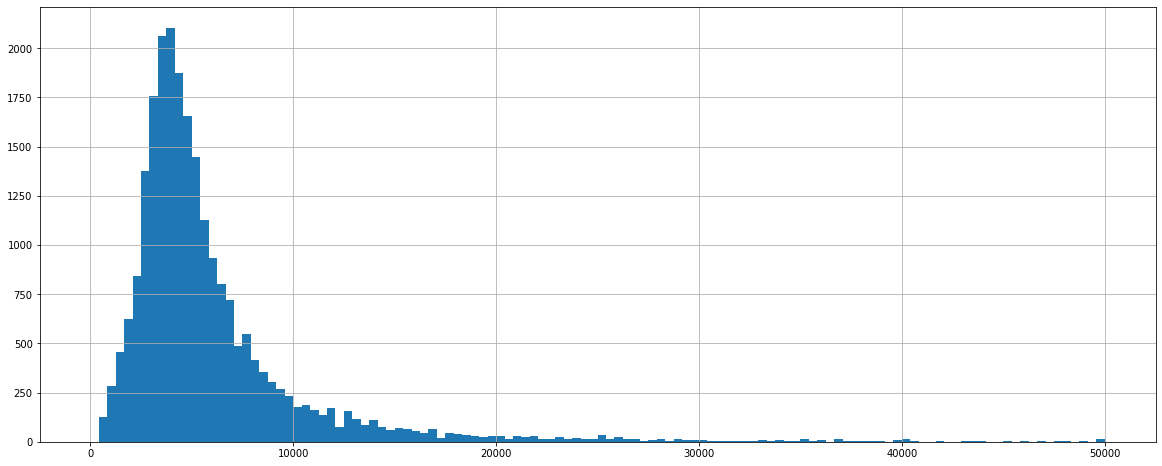

In [45]:
(data['last_price']/1000).hist(bins =120,range=(0,50000), figsize=(20,8))

<AxesSubplot:>

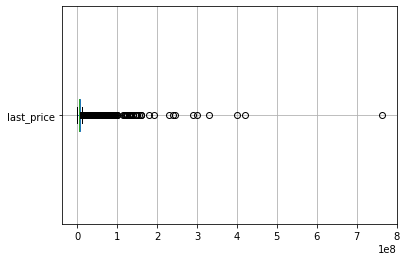

In [46]:
data.boxplot('last_price', vert=False)

Категоризируем показатели

In [47]:
def new_last_price(l_price):
    try:
        if l_price <= 500000:
            return '<=500тыс_руб'
        elif 500000 <= l_price <= 10000000:
            return '501-10000тыс_руб'
        elif 10001000 <= l_price <= 20000000:
            return '10001-20000тыс_руб'
        elif 20001000 <= l_price <= 30000000:
            return '20001-30000тыс_руб'
        elif l_price >= 30001000:
            return '>=30001тыс_руб'
    except:
        pass

new_last_price_category = data['last_price'].apply(new_last_price) 
new_last_price_category.value_counts()

501-10000тыс_руб      20849
10001-20000тыс_руб     1994
20001-30000тыс_руб      389
>=30001тыс_руб          315
<=500тыс_руб             18
Name: last_price, dtype: int64

In [48]:
#удаляем редкие и выбивающиеся значения - менее 500 тыс.руб. и свыше 20 000 тыс.руб. 
# пока не запускаем, чтобы не нарушать гистограммы последующих параметров.
#data = data[(data['last_price']<=20000000)&(data['last_price']>500000)]
#data

**Количество комнат**

Создаем гистограмму.

<AxesSubplot:>

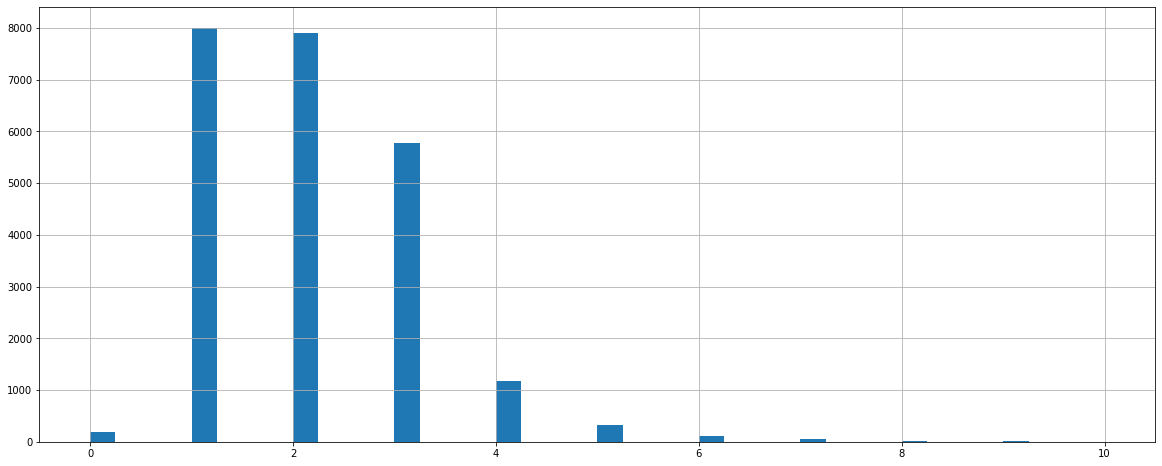

In [49]:
data['rooms'].hist(bins =40,range=(0,10), figsize=(20,8))

посчитаем сколько объявлений было с каждым количеством комнат.

In [50]:
data['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [51]:
#удаляем редкие и выбивающиеся значения - менее 1 комнаты и свыше 4 комнат
# пока не запускаем, чтобы не нарушать гистограммы последующих параметров.
#data = data[(data['rooms']<=4)&(data['rooms']>=1)]
#data

**Высота потолков**

Создаем гистограмму и диаграмму размаха.

<AxesSubplot:>

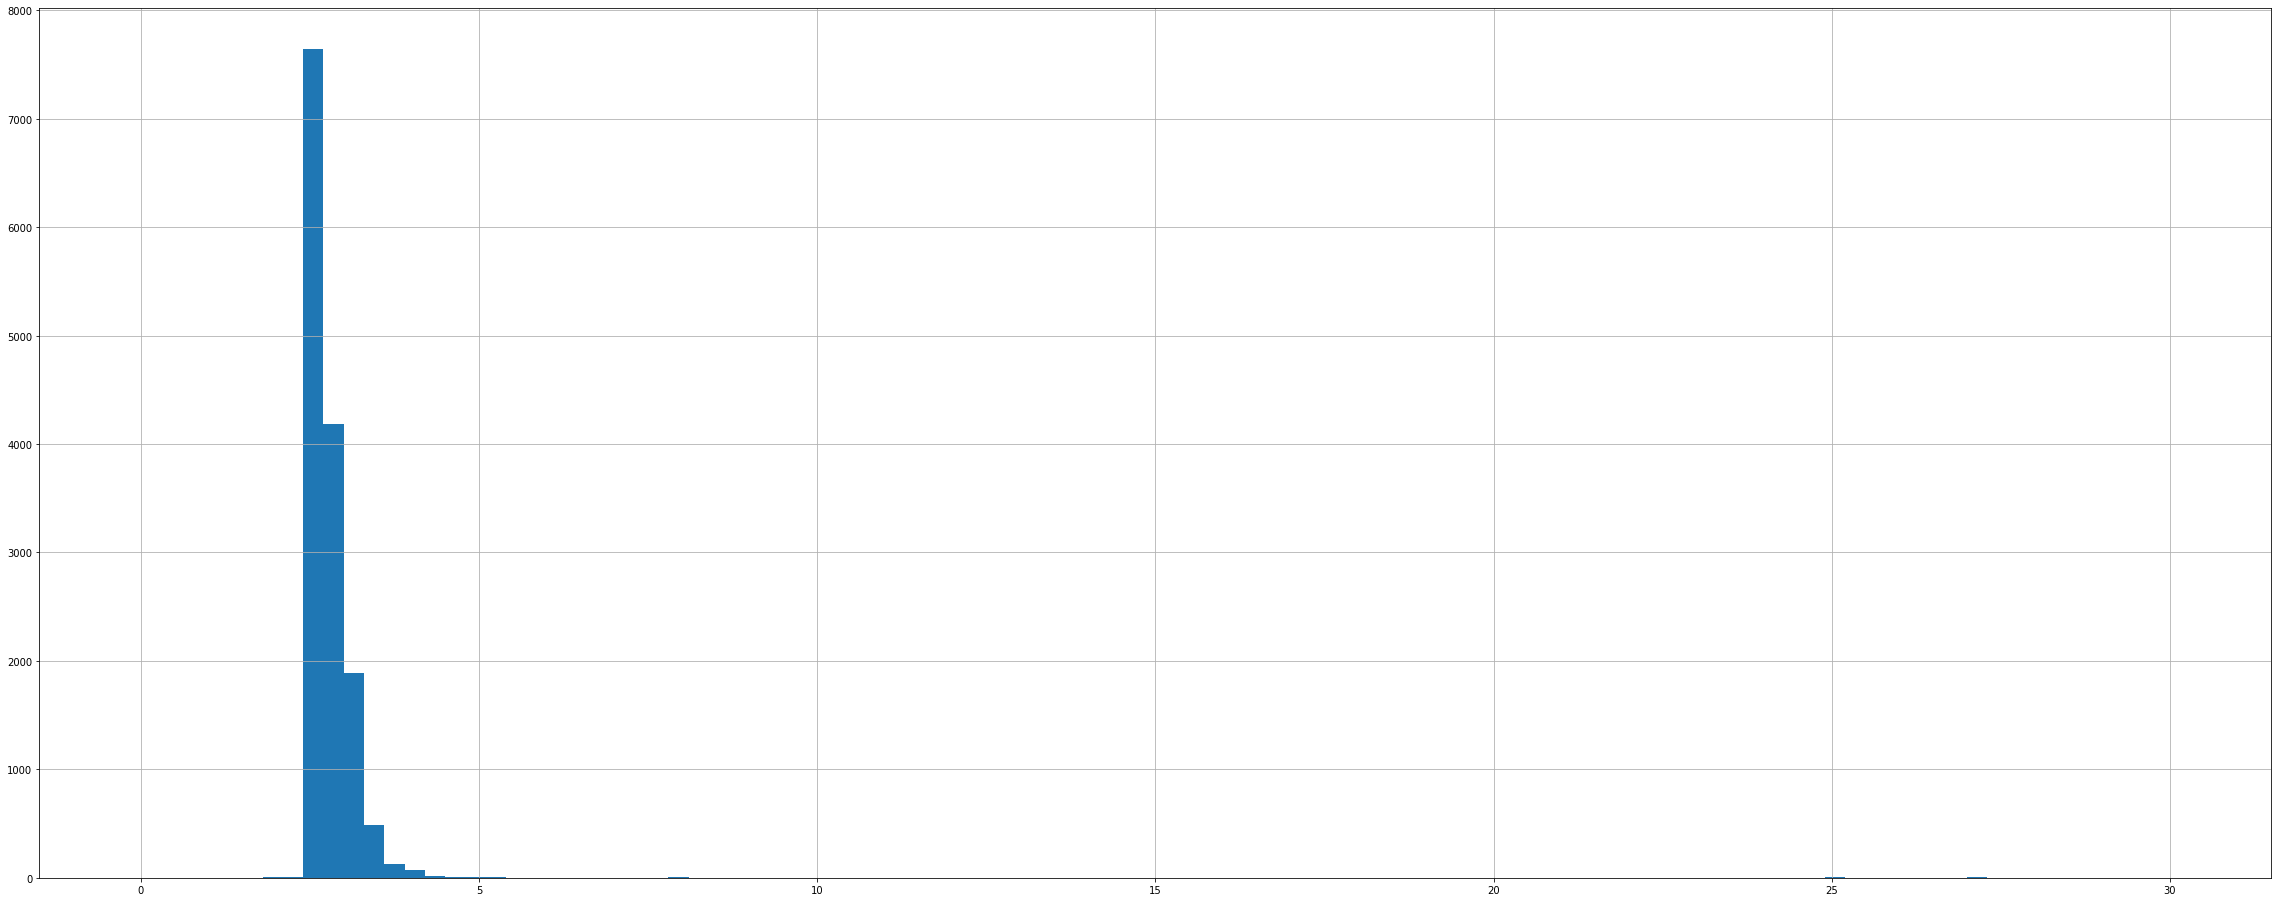

In [52]:
data['ceiling_height'].hist(bins=100,range=(0,30), figsize=(40,16))

<AxesSubplot:>

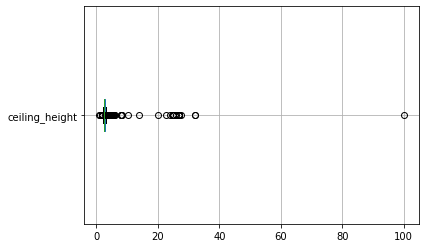

In [53]:
data.boxplot('ceiling_height', vert=False)

Категоризируем показатели.

In [54]:
def new_ceiling_height(c_height):
    try:
        if c_height < 2.50:
            return '<2.50'
        elif 2.50 <= c_height <= 3.50:
            return '2.50-3.50'
        elif 3.51 <= c_height <= 4.50:
            return '3.51-4.50'
        elif c_height >= 4.51:
            return '>=4.51'
    except:
        pass

new_ceiling_height_category = data['ceiling_height'].apply(new_ceiling_height) 
new_ceiling_height_category.value_counts()


2.50-3.50    14106
3.51-4.50      260
<2.50           73
>=4.51          42
Name: ceiling_height, dtype: int64

In [55]:
#удаляем редкие и выбивающиеся значения - менее 2.50 м.  и свыше 3.50
# пока не запускаем, чтобы не нарушать гистограммы последующих параметров.
#data = data[((data['ceiling_height']<=3.50)&(data['ceiling_height']>=2.50))|(data['ceiling_height'].isna())]
#data

**Тип этажа квартиры («первый», «последний», «другой»)**

Создаем гистограмму.

<AxesSubplot:>

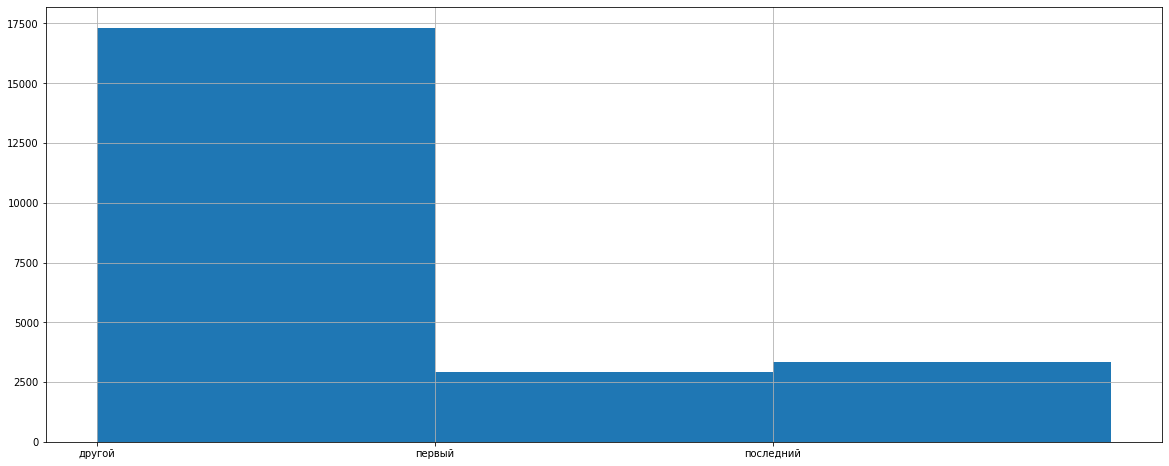

In [56]:
data['apartment_floor_type'].hist(bins =3,range=(0,3), figsize=(20,8))

посчитаем сколько было объявлений по каждому значению.

In [57]:
data['apartment_floor_type'].value_counts()

другой       17326
последний     3330
первый        2909
Name: apartment_floor_type, dtype: int64

In [58]:
#редкие и выбивающиеся значения отсутствуют. В основном жилье находится между первым и последним этажами.

**Общее количество этажей в доме**

Создаем гистограмму и диаграмму размаха.

<AxesSubplot:>

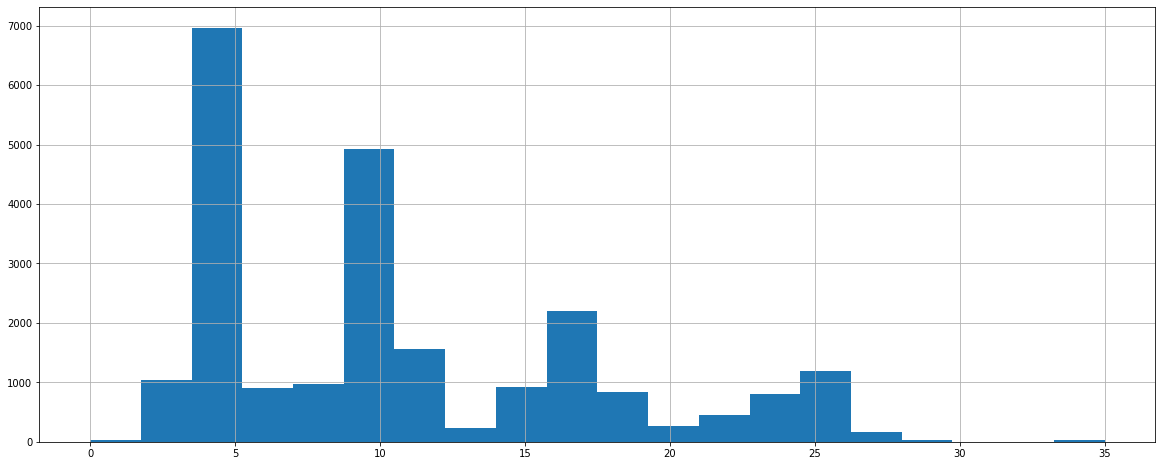

In [59]:
data['floors_total'].hist(bins =20,range=(0,35), figsize=(20,8))

<AxesSubplot:>

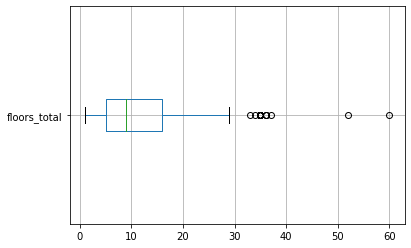

In [60]:
data.boxplot('floors_total', vert=False)

посчитаем сколько было объявлений по каждому значению.

In [61]:
data['floors_total'].value_counts()

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

In [62]:
#удаляем редкие и выбивающиеся значения - менее 2 этажей  и свыше 27 этажей
# пока не запускаем, чтобы не нарушать гистограммы последующих параметров.
#data = data[(data['floors_total']<=27)&(data['floors_total']>=2)]
#data

**Расстояние до центра города в метрах**

Создаем гистограмму и диаграмму размаха.

<AxesSubplot:>

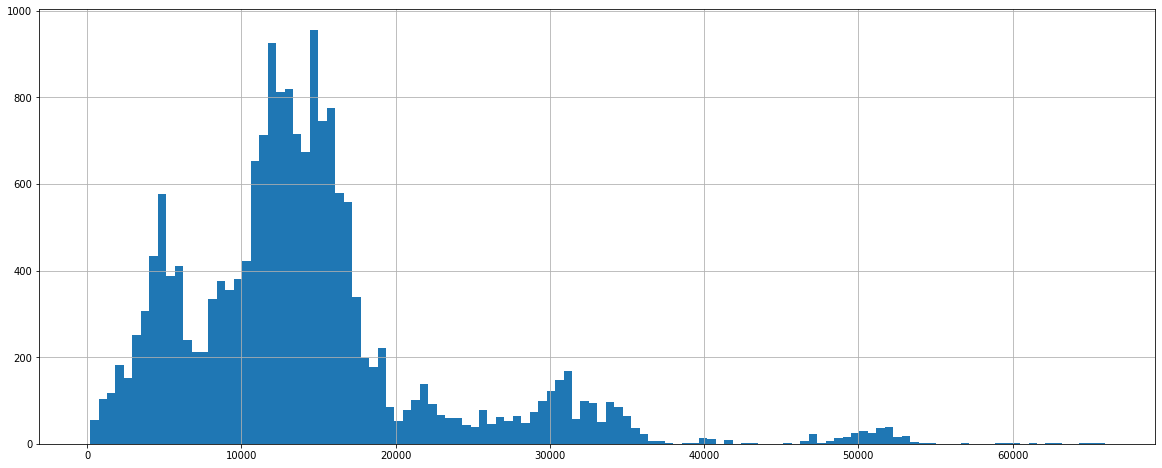

In [63]:
data['cityCenters_nearest'].hist(bins =120, figsize=(20,8))

<AxesSubplot:>

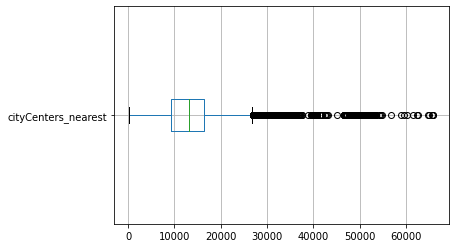

In [64]:
data.boxplot('cityCenters_nearest', vert=False)

Категоризируем данные.

In [65]:
def new_cityCenters_nearest(cC_nearest):
    try:
        if cC_nearest <= 10000:
            return '<=10000'
        elif 10001 <= cC_nearest <= 20000:
            return '10001-20000'
        elif 20001 <= cC_nearest <= 30000:
            return '20001-30000'
        elif 30001 <= cC_nearest <= 36000:
            return '30001-36000'
        elif cC_nearest >= 36001:
            return '>=36001'
    except:
        pass

cityCenters_nearest_category = data['cityCenters_nearest'].apply(new_cityCenters_nearest) 
cityCenters_nearest_category.value_counts()


10001-20000    10392
<=10000         5060
20001-30000     1280
30001-36000      993
>=36001          339
Name: cityCenters_nearest, dtype: int64

In [66]:
#удаляем редкие и выбивающиеся значения -  свыше 36 000 м.
# пока не запускаем, чтобы не нарушать гистограммы последующих параметров.
#data = data[(data['cityCenters_nearest']<=36000)(data['cityCenters_nearest'].isna())]
#data

**Расстояние до ближайшего парка**

Создаем гистограмму и диаграмму размаха.

<AxesSubplot:>

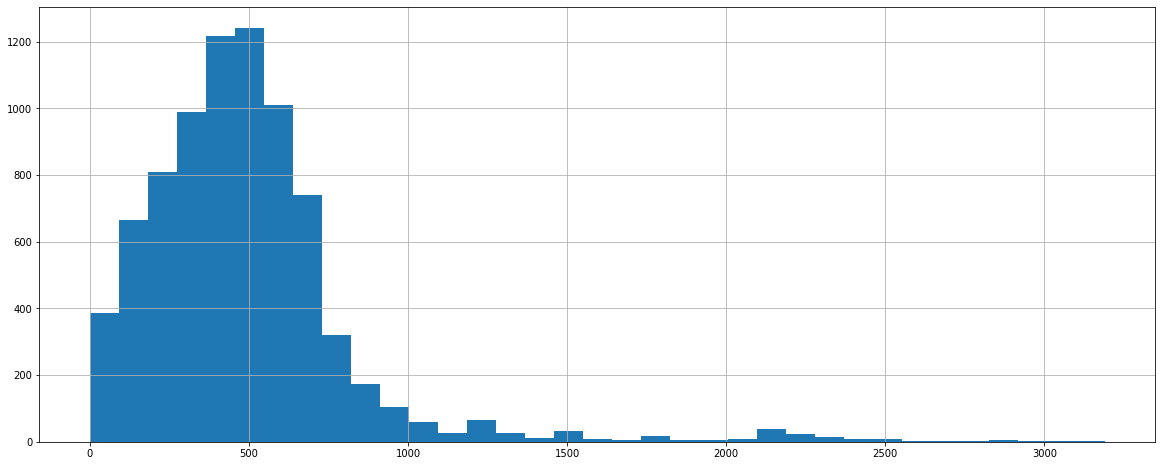

In [67]:
data['parks_nearest'].hist(bins =35, figsize=(20,8))

<AxesSubplot:>

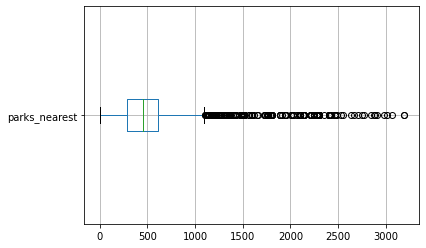

In [68]:
data.boxplot('parks_nearest', vert=False)

Категоризируем данные.

In [69]:
def new_parks_nearest(p_nearest):
    try:
        if p_nearest <= 500:
            return '<=500'
        elif 501 <= p_nearest <= 1000:
            return '501-1000'
        elif p_nearest >= 1001:
            return '>=1001'
    except:
        pass

new_parks_nearest_category = data['parks_nearest'].apply(new_parks_nearest) 
new_parks_nearest_category.value_counts()


<=500       4670
501-1000    2986
>=1001       374
Name: parks_nearest, dtype: int64

In [70]:
#удаляем редкие и выбивающиеся значения -  свыше 1 550 м.
#data = data[(data['parks_nearest']<=1550)|(data['parks_nearest'].isna())]
#data

Характеристики до удаления редких/ выбивающихся значений

In [71]:
data[{'total_area','living_area','kitchen_area','last_price','rooms','ceiling_height','floors_total','cityCenters_nearest','parks_nearest'}].describe()

,ceiling_height,rooms,last_price,cityCenters_nearest,living_area,total_area,floors_total,kitchen_area,parks_nearest
count,14481.000000,23565.000000,2.356500e+04,18064.000000,23565.000000,23565.000000,23565.000000,23565.000000,8030.000000
mean,2.771283,2.070656,6.540058e+06,14192.656056,34.560141,60.322824,10.675875,10.565462,490.580448
std,1.261983,1.078591,1.091093e+07,8613.348153,22.345289,35.657060,6.594823,6.093273,341.572956
min,1.000000,0.000000,1.219000e+04,181.000000,2.000000,12.000000,1.000000,1.300000,1.000000
25%,2.510000,1.000000,3.400000e+06,9238.000000,19.000000,40.000000,5.000000,7.000000,288.000000
50%,2.650000,2.000000,4.646000e+06,13096.500000,30.000000,52.000000,9.000000,9.000000,455.000000
75%,2.800000,3.000000,6.790000e+06,16285.000000,42.100000,69.700000,16.000000,12.000000,612.000000
max,100.000000,19.000000,7.630000e+08,65968.000000,409.700000,900.000000,60.000000,112.000000,3190.000000


Удаляем редкие и выбивающиеся значения по всем изученнным парметрам:

In [72]:



#Oбщая площадь. редкие и выбивающиеся значения - свыше 200 кв. м. и менее 20 кв.м.
data = data[(data['total_area']<=200)&(data['total_area']>20)]

#Жилая площадь.редкие и выбивающиеся значения - менее 10 кв. м. и свыше 120 кв. м. 
data = data[(data['living_area']<=120)&(data['living_area']>10)]

#площадь кухни.  редкие и выбивающиеся значения - менее 4 кв. м. и свыше 30 кв. м. 
data = data[(data['kitchen_area']<=30)&(data['kitchen_area']>4)]

#цена объекта. редкие и выбивающиеся значения - менее 500 тыс.руб. и свыше 20 000 тыс.руб. 
data = data[(data['last_price']<=20000000)&(data['last_price']>500000)]

#количество комнат; редкие и выбивающиеся значения - менее 1 комнаты и свыше 4 комнат
data = data[(data['rooms']<=4)&(data['rooms']>=1)]

#высота потолков; редкие и выбивающиеся значения - менее 2.50 м.  и свыше 3.50
data = data[((data['ceiling_height']<=3.50)&(data['ceiling_height']>=2.50))|(data['ceiling_height'].isna())]

#тип этажа квартиры («первый», «последний», «другой»);редкие и выбивающиеся значения отсутствуют. В основном жилье находится между первым и последним этажами.

#общее количество этажей в доме; редкие и выбивающиеся значения - менее 2 этажей  и свыше 27 этажей
data = data[(data['floors_total']<=27)&(data['floors_total']>=2)]

#расстояние до центра города в метрах; редкие и выбивающиеся значения -  свыше 36 000 м.
data = data[(data['cityCenters_nearest']<=36000)|(data['cityCenters_nearest'].isna())]

#расстояние до ближайшего парка. редкие и выбивающиеся значения -  свыше 1 550 м.
data = data[(data['parks_nearest']<=1550)|(data['parks_nearest'].isna())]
data


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_2,one_square_price,weekday_exposition,month_exposition,year_exposition,apartment_floor_type,cityCenters_nearest_KM
0,20,13000000.0,108.00,2019-03-07,3,2.7,16.0,51.000000,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.600000,1,False,False,False,11.000000,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.400000,5,False,False,False,9.100000,0.0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.600000,6,False,False,False,14.400000,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово,99195.71,3,11,2017,другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.6,9.0,40.000000,8,False,False,False,8.000000,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,Петергоф,73717.95,4,8,2016,другой,34.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.000000,4,False,False,False,8.500000,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Тосно,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700000,1,False,False,False,10.623014,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Рождествено,44091.71,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.0,17.0,43.345754,12,False,False,False,23.300000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,Санкт-Петербург,149511.40,1,3,2017,другой,10.0


Характеристики после удаления редких/ выбивающихся значений

In [73]:
data[{'total_area','living_area','kitchen_area','last_price','rooms','ceiling_height','floors_total','cityCenters_nearest','parks_nearest'}].describe()

,ceiling_height,rooms,last_price,cityCenters_nearest,living_area,total_area,floors_total,kitchen_area,parks_nearest
count,12918.000000,21248.000000,2.124800e+04,15995.000000,21248.000000,21248.000000,21248.000000,21248.000000,6759.000000
mean,2.688296,1.973645,5.259457e+06,14057.856455,31.572757,55.215905,10.845397,9.820353,465.518716
std,0.206214,0.882552,2.949502e+06,7039.119320,14.100529,20.849506,6.548475,3.839091,248.248510
min,2.500000,1.000000,5.200000e+05,287.000000,10.080000,20.670000,2.000000,4.009391,1.000000
25%,2.500000,1.000000,3.400000e+06,10207.500000,18.700000,40.000000,5.000000,7.000000,292.000000
50%,2.620000,2.000000,4.500000e+06,13302.000000,29.994525,50.600000,9.000000,9.000000,456.000000
75%,2.750000,3.000000,6.300000e+06,16268.000000,40.200000,65.900000,16.000000,11.350000,610.000000
max,3.500000,4.000000,2.000000e+07,35892.000000,118.500000,200.000000,27.000000,30.000000,1514.000000


**Наблюдения по  изученным параметрам:**

**общая площадь**: 

Медиана: было 52 м (стало 50.6 м)

Пик(и): 40-50 м. 

Тип распределения:распределение Пуассона

редкие и выбивающиеся значения - свыше 200 кв. м. и менее 20 кв.м.;


**жилая площадь**: 

Медиана:было 30 м(стало 29.99)

Пик(и): 2 пика. Первый(большой): 16.5 - 20.5 м.; второй(меньший) :30-35 м. Можно объяснить, что первый пик для однокомнатной квартиры, а второй для квартир для квартир с комнатиами от 2 и более. 

Тип распределения:Гипергеометрическое распределение

редкие и выбивающиеся значения - менее 10 кв. м. и свыше 120 кв. м. ;


**площадь кухни**: 

Медиана: было 9 м (стало 9 м)

Пик(и):  6 - 10,5 м

Тип распределения: распределение Пуассона

редкие и выбивающиеся значения - менее 4 кв. м. и свыше 30 кв. м.;

Сдвиг графиков с площадьми влево можно объяснить большим количеством объектов с 1 или 2 комнатами.


**цена объекта**: 

Медиана: было 4.646 тыс. руб. (4 500 тыс. руб)

Пик(и): 3.500 - 4.500 тыс руб.

Тип распределения:распределение Пуассона

редкие и выбивающиеся значения - менее 500 тыс.руб. и свыше 20 000 тыс.руб.;


**количество комнат**: 

Медиана: было 2 ком. ( стало 2 ком.)

Пик(и):1 и 2 комнаты (примерно одинаковые) 

Тип распределения:распределение Пуассона

редкие и выбивающиеся значения - менее 1 комнаты и свыше 5 комнат;


**высота потолков**: 

Медиана:было 2.65 м. (стало 2.62 м)

Пик(и): 2.5-3.0 м.

Тип распределения:распределение Пуассона

редкие и выбивающиеся значения - менее 2.50 м.  и свыше 3.50 м;


**тип этажа квартиры («первый», «последний», «другой»)**:  


редкие и выбивающиеся значения отсутствуют. В основном жилье находится между первым и последним этажами.;


**общее количество этажей в доме**: 

Медиана: было 9 эт. ( стало 9 эт.)

Пик(и): 5,9, 16, 25. Связано с особенностью строительства большинства современных домов. В основном дома строят(строили) с подобной этажностью.

Тип распределения:Гипергеометрическое распределение

редкие и выбивающиеся значения - менее 2 этажей  и свыше 27 этажей;


**расстояние до центра города в метрах**: 

Медиана: было 13 096.5 м. (стало 13 302 м)

Пик(и): 2 пика. Первый(меньший) -  5 000 м , второй(больший) - 11 000-15 000 м.  Связано с большой долей(более 65%) объявлений из Санкт-Петербурга. Соответственно, второй пик характерен для Санкт-Петербурга, а  первый для остальных населенных пунктов. Также большое расстояние до центра связано с тем, что основное количество пропусков в столбце - это населенные пункты помимо Санкт-Петербурга  и в основном  в этот столбец вошли данные по Санкт-Петербургу(около 87%).

Тип распределения:Гипергеометрическое распределение

редкие и выбивающиеся значения -  свыше 36 000 м.;


**расстояние до ближайшего парка** 

Медиана:было 455 м.(стало 456 м)

Пик(и):500 м. Небольшое расстояние до парка можно объяснить большим количеством пропусков, в частности большим количеством пропусков в больших городах, в том числе Санкт-Петербурге(больше половины объявлений с пропусками в этом столбце).

Тип распределения:распределение Пуассона

редкие и выбивающиеся значения-свыше 1 550 м.


**Количество объявлений снизилось с 23 565 до 21 248. Это на 2 317 (9.8%)**

Таким образом, объект с обычными параметрами - это объект с общая площадь 40-65.9 кв.м., жилой 18.7-40.2 кв. м., с площадью кухни 7-11.35 кв. м., ценой 3 400 - 6 300 тыс.руб.,количеством комнат 1 - 3 комнат,высотой потолков 2.5 -2.75 ,находится между первым и последним этажами.

Из-за большого количества пропуском обычные показатели расстояние до центра города в метрах и расстояние до ближайшего парка не полностью отображают действительность: расстояние до центра города в метрах - 10 207.5 - 16 268 м.(завышен), а расстояние до ближайшего парка 292- 610 м (занижен).

**4.2 Изучите, как быстро продавались квартиры.**

<AxesSubplot:>

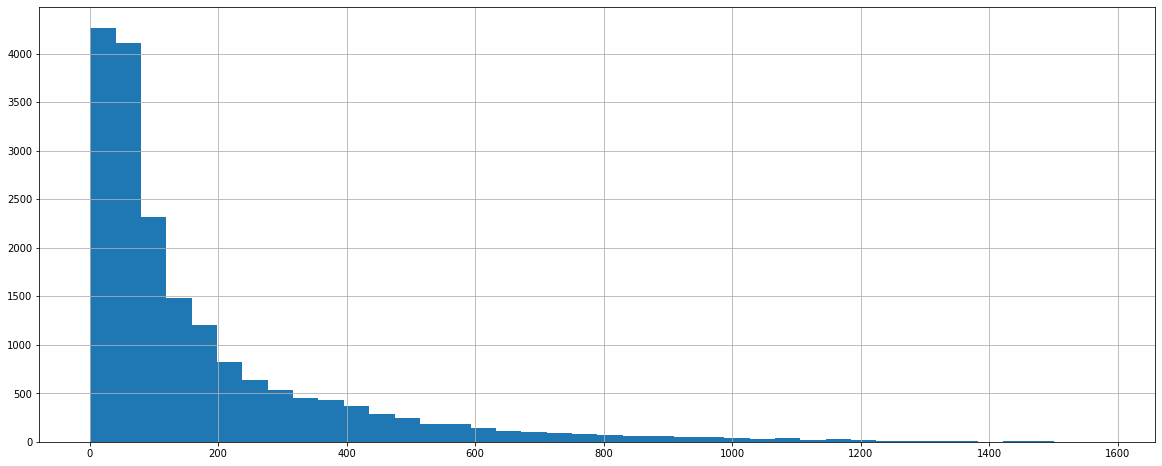

In [74]:
data['days_exposition'].hist(bins =40, figsize=(20,8))

<AxesSubplot:>

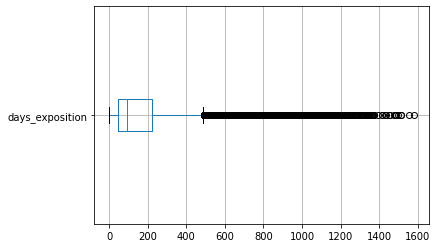

In [75]:
data.boxplot('days_exposition', vert=False)

In [76]:
data['days_exposition'].describe()

count    18544.000000
mean       175.132496
std        213.029189
min          1.000000
25%         44.000000
50%         92.000000
75%        222.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Cколько обычно занимает продажа - 44-222 дня. 
Какие продажи можно считать быстрыми - до 44 дней, 
какие необычно долгими - свыше 222 дней.**

**4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта? Изучите, зависит ли цена от:**

**Oбщей площади**

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

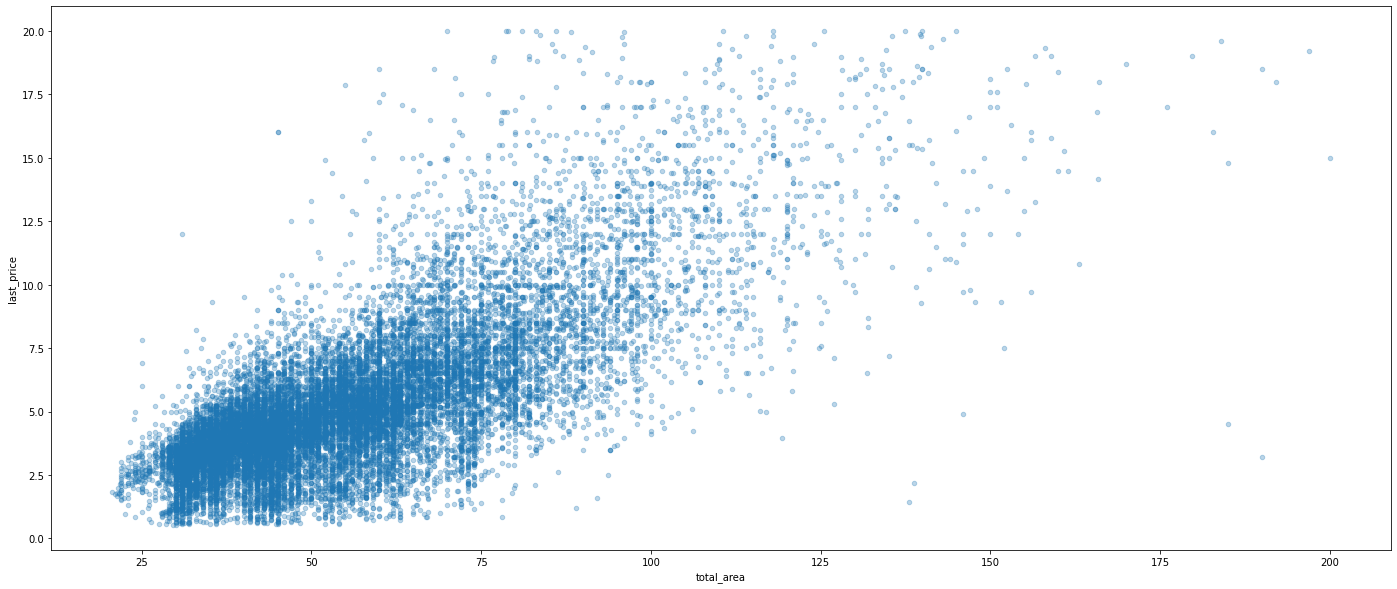

In [77]:
data['last_price'] = data['last_price']/1000000  # столбец 'last_price' разделил на 1000000
data.plot(y='last_price', x='total_area',kind='scatter', figsize=(24, 10),alpha=0.3)

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

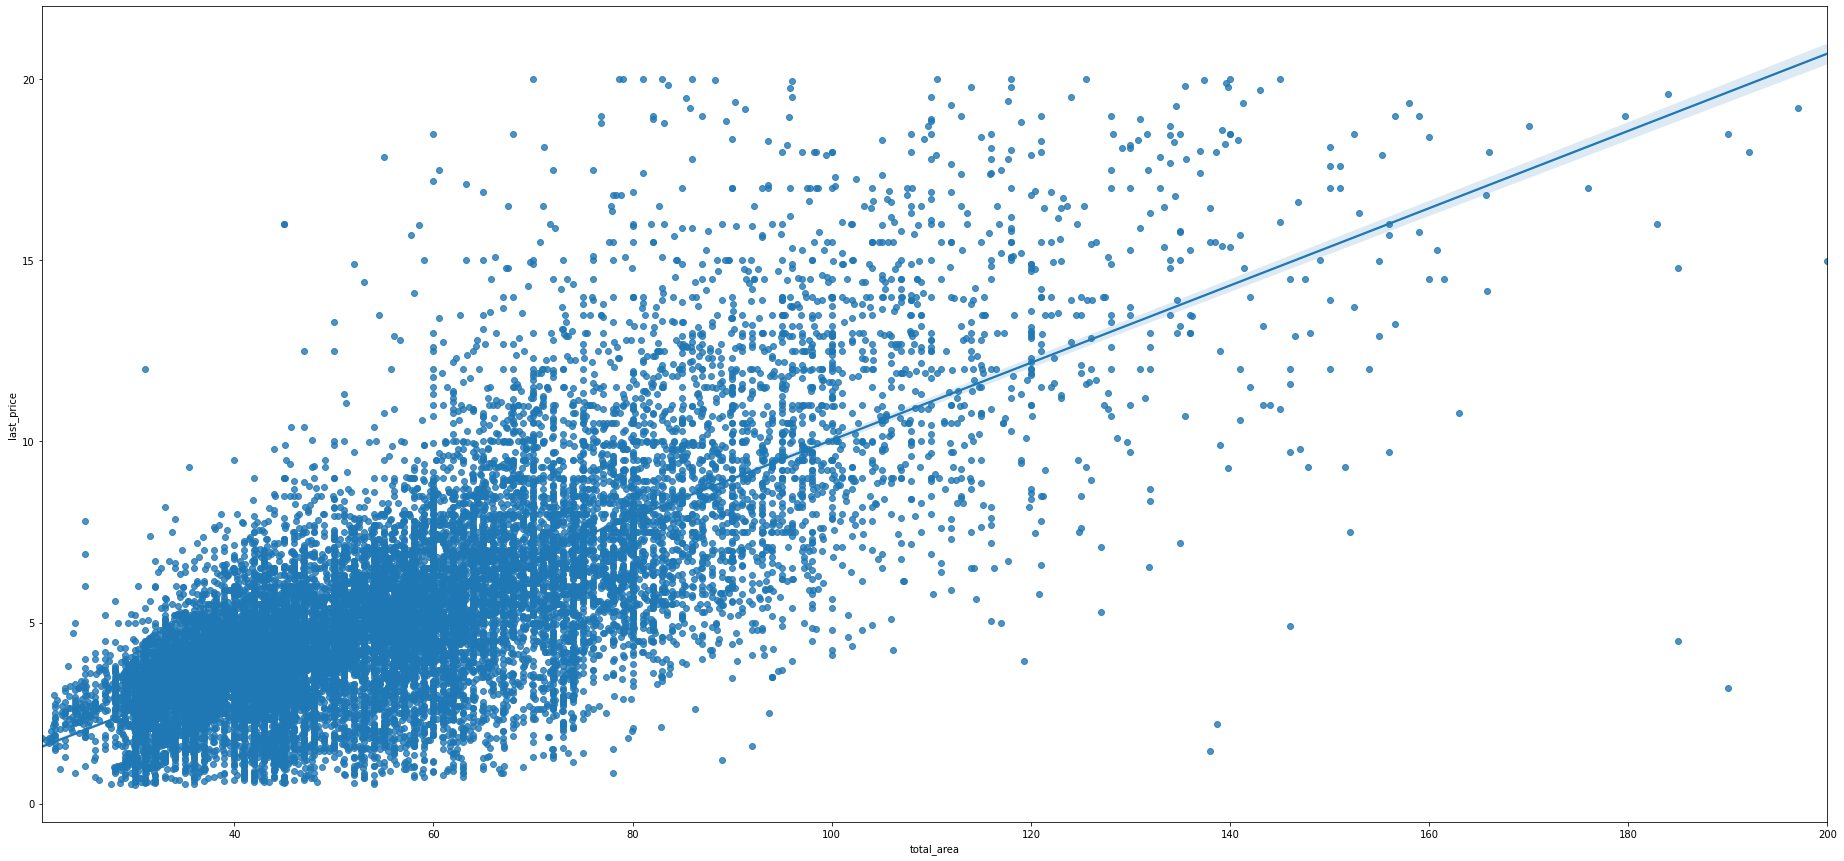

In [78]:
plt.figure(figsize=(32,15))
sns.regplot(y='last_price', x='total_area',data=data)

In [79]:
data['last_price'].corr(data['total_area'])

0.7543683919774206

**Жилой площади**

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

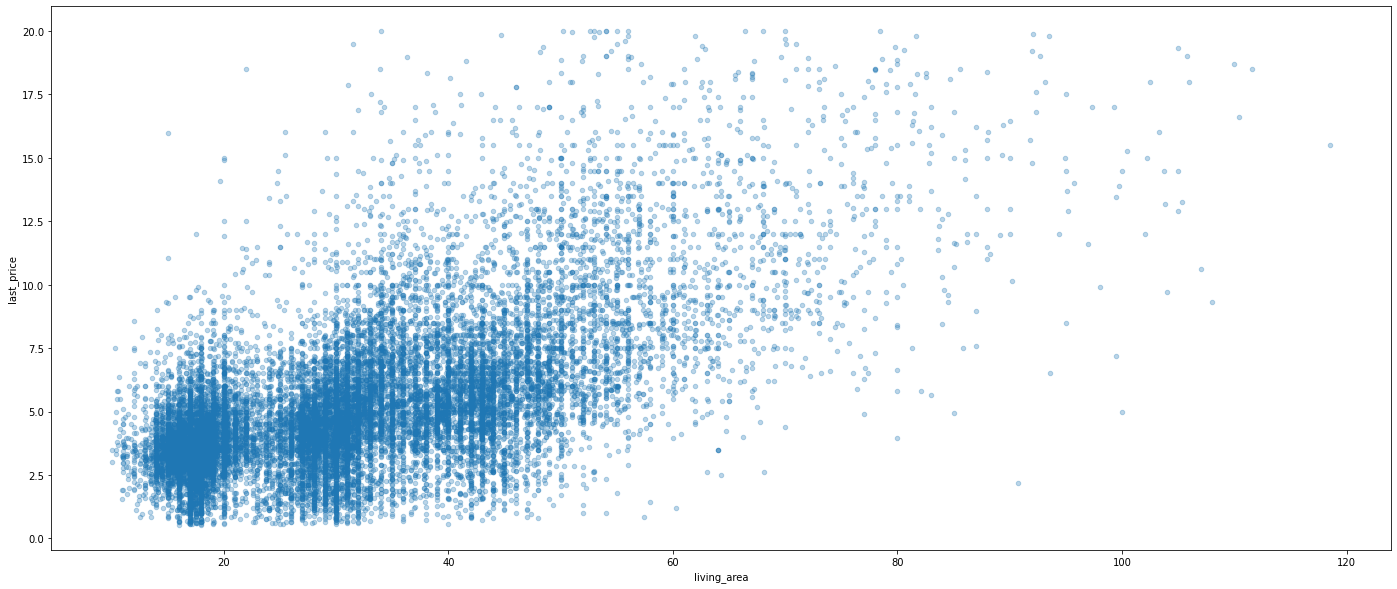

In [80]:
data.plot(y='last_price', x='living_area',kind='scatter', figsize=(24, 10),alpha=0.3)

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

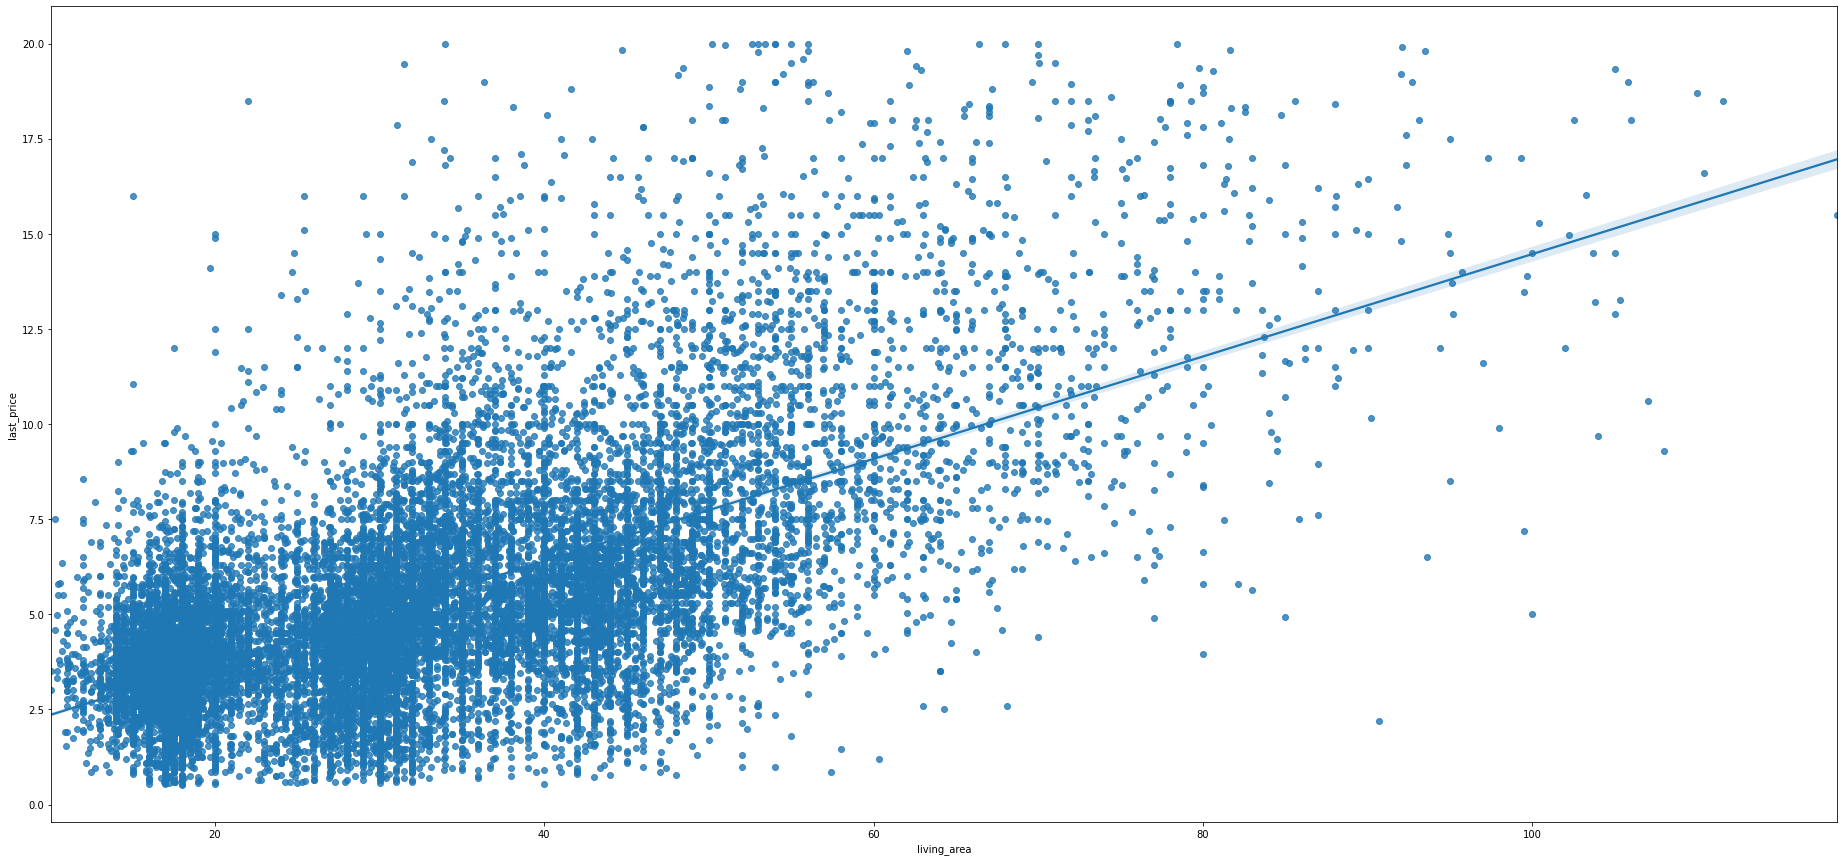

In [81]:
plt.figure(figsize=(32,15))
sns.regplot(y='last_price', x='living_area',data=data)

In [82]:
data['last_price'].corr(data['living_area'])

0.6434124096955026

**Площади кухни**

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

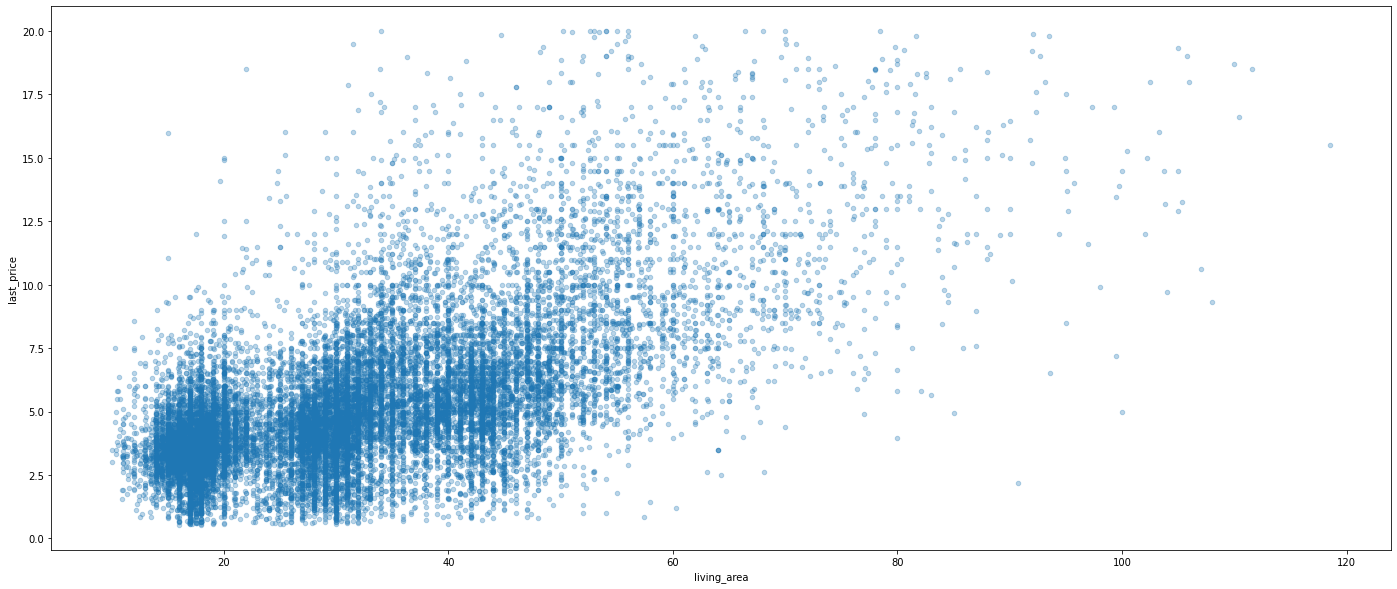

In [83]:
data.plot(y='last_price', x='living_area',kind='scatter', figsize=(24, 10),alpha=0.3)

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

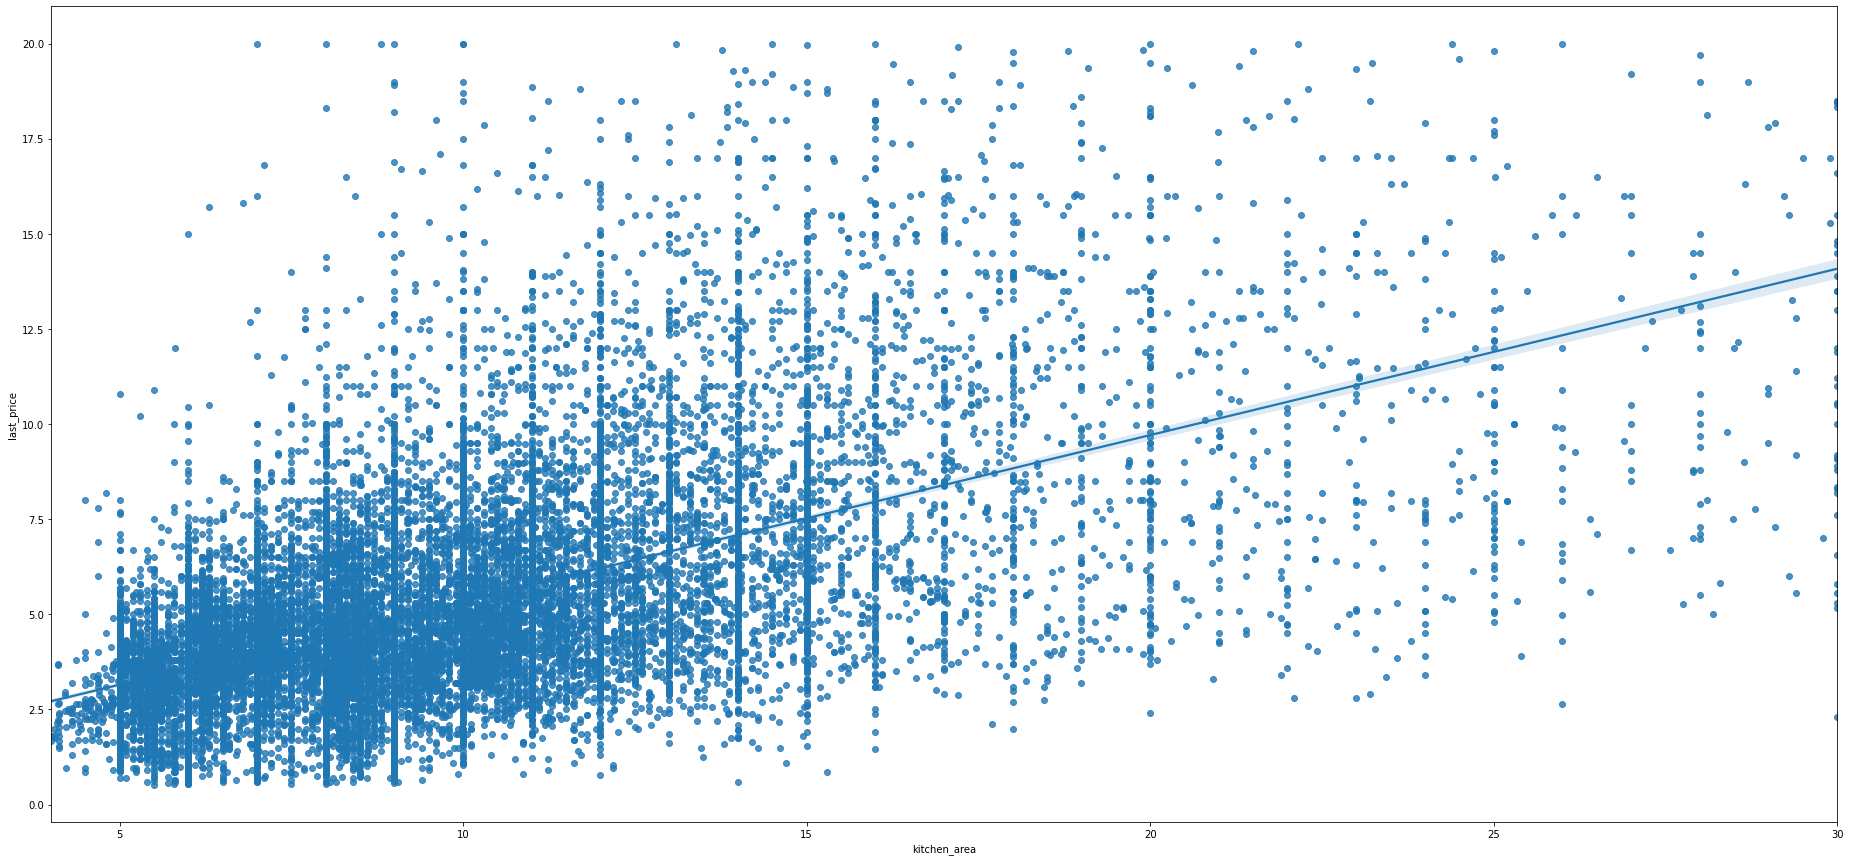

In [84]:
plt.figure(figsize=(32,15))
sns.regplot(y='last_price', x='kitchen_area',data=data)

In [85]:
data['last_price'].corr(data['kitchen_area'])

0.5690712139395484

**Количество комнат**

<AxesSubplot:xlabel='rooms'>

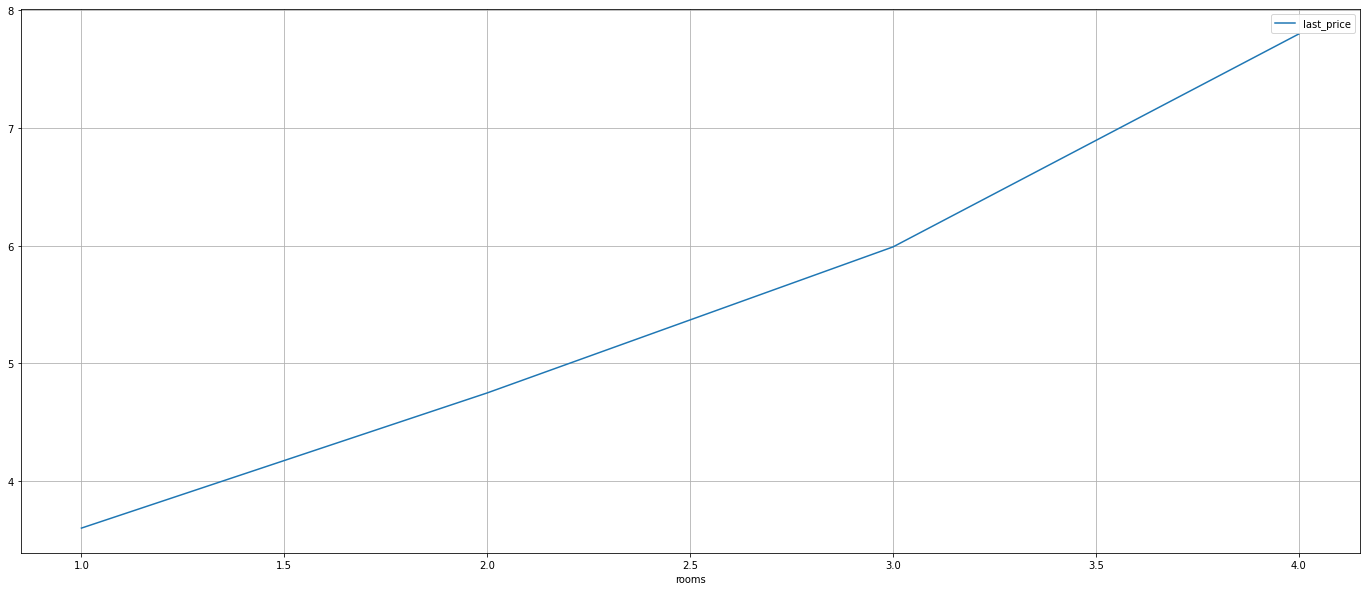

In [86]:
data.pivot_table(index='rooms', values='last_price',aggfunc='median').plot(grid=True, figsize=(24, 10))

**Типа этажа, на котором расположена квартира (первый, последний, другой)**

<AxesSubplot:xlabel='apartment_floor_type'>

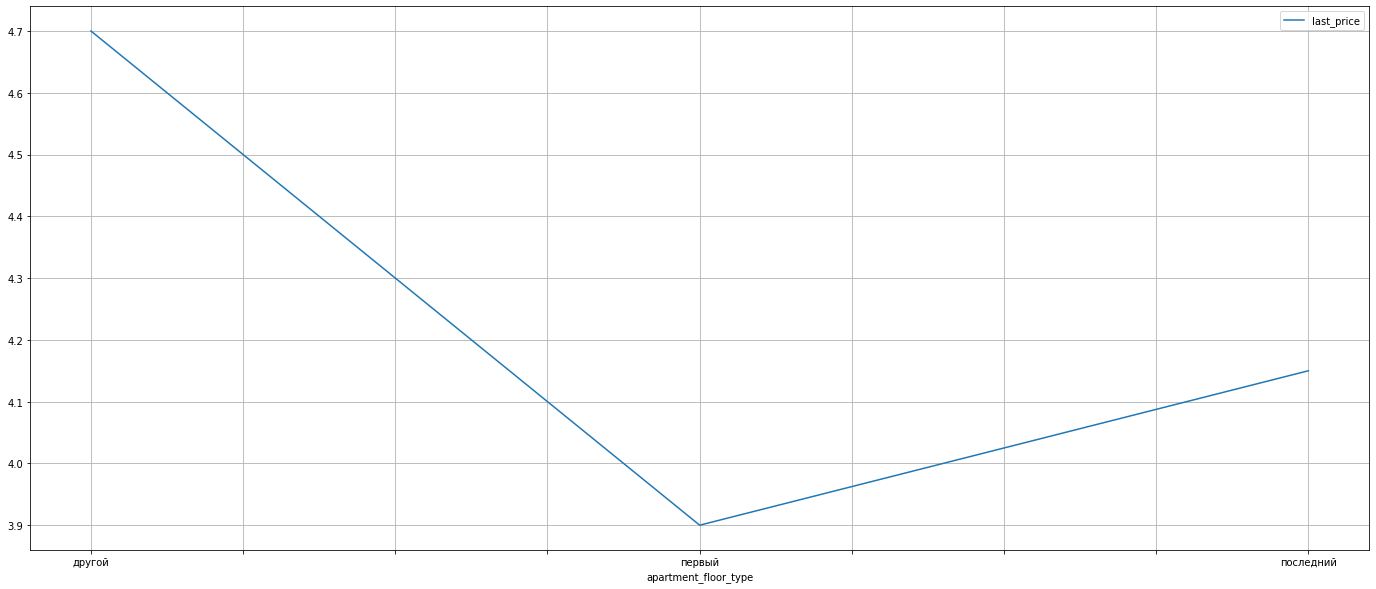

In [87]:
data.pivot_table(index='apartment_floor_type', values='last_price',aggfunc='median').plot(grid=True, figsize=(24, 10))

**Даты размещения (день недели, месяц, год)**

**день недели**

<AxesSubplot:xlabel='weekday_exposition'>

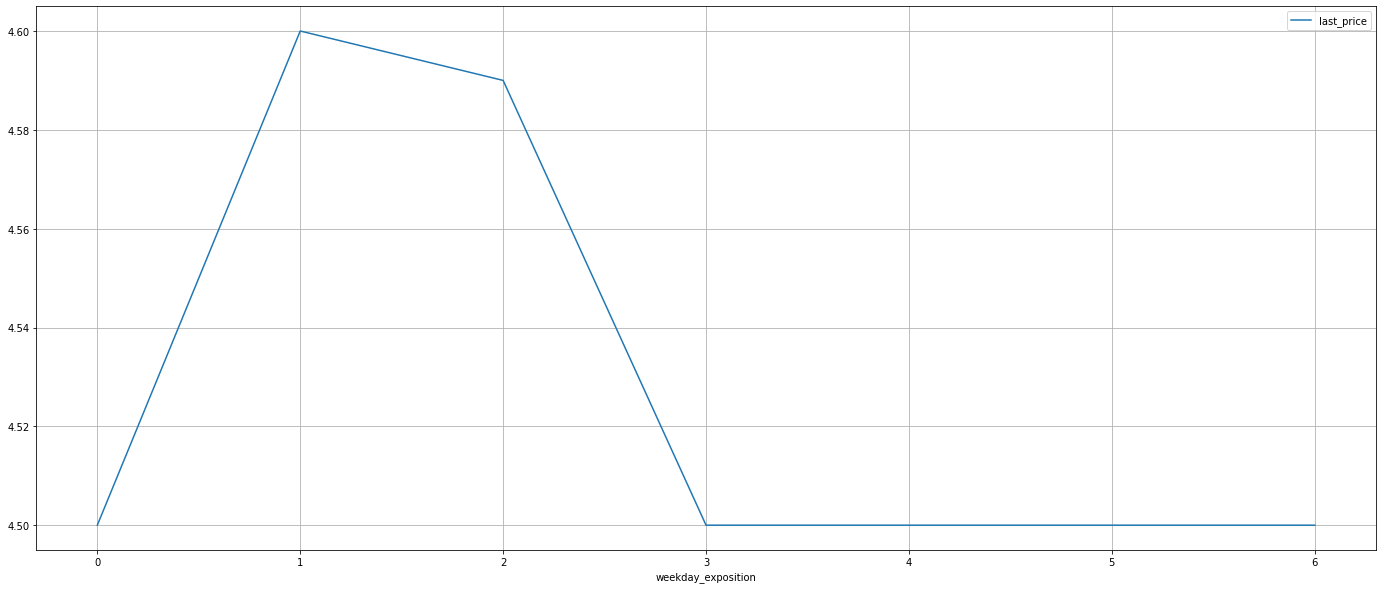

In [88]:
data.pivot_table(index='weekday_exposition', values='last_price',aggfunc='median').plot(grid=True, figsize=(24, 10))

**месяц**

<AxesSubplot:xlabel='month_exposition'>

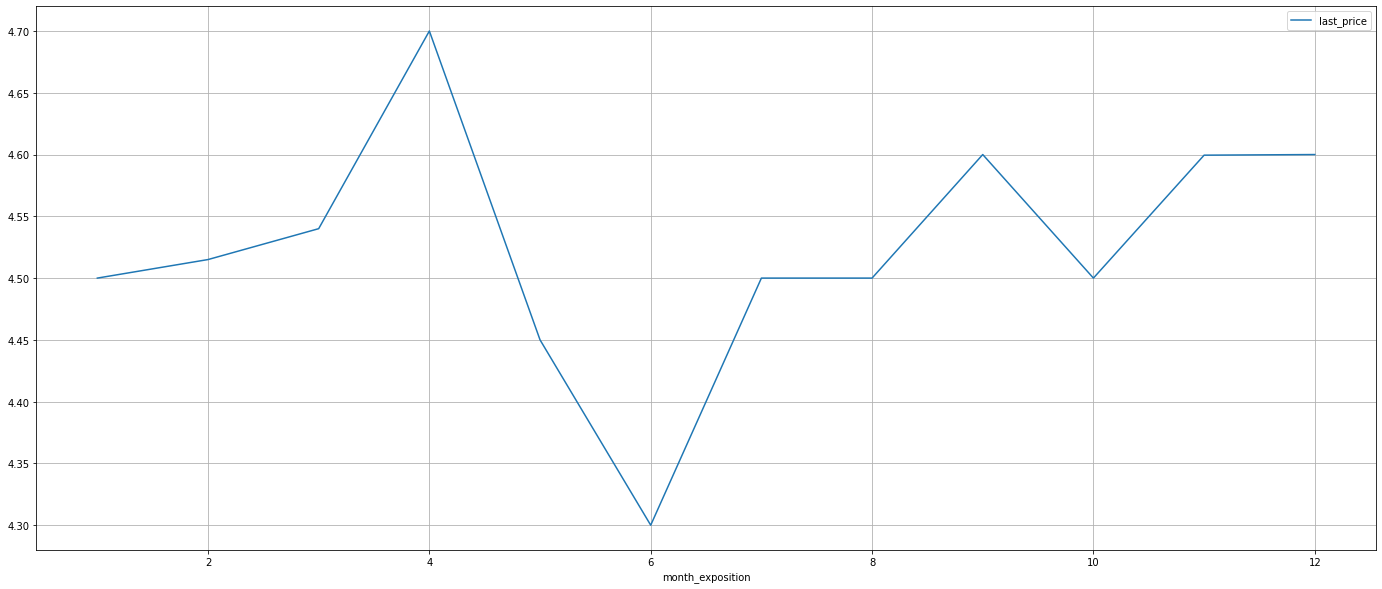

In [89]:
data.pivot_table(index='month_exposition', values='last_price',aggfunc='median').plot(grid=True, figsize=(24, 10))

**год**

<AxesSubplot:xlabel='year_exposition'>

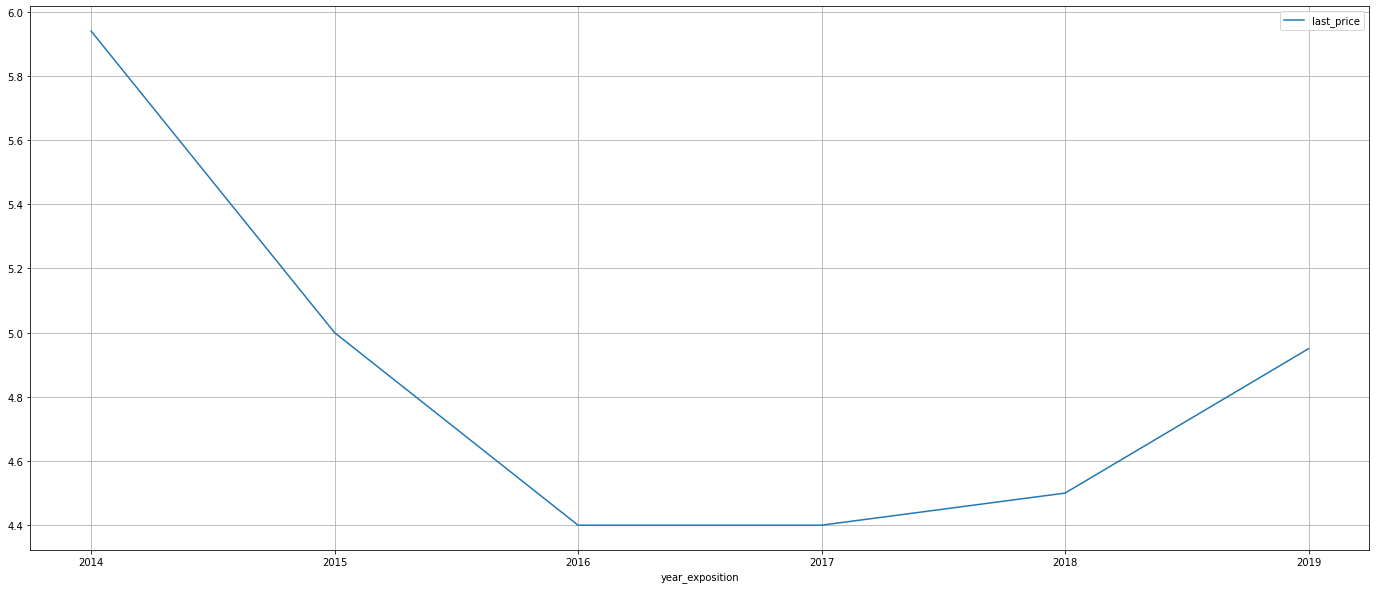

In [90]:
data.pivot_table(index='year_exposition', values='last_price',aggfunc='median').plot(grid=True, figsize=(24, 10))

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**


1)Стоимость объекта зависит от **площади**. **Чем больше площадь , тем выше стоимость.**

Наибольшая зависимость от **общей площади - корреляция 0.75.**

**Корреляция от жилой площади - 0.64.**

Наименьшая - **от площади кухни -корреляция 0.57.**

Есть несколько нетипичных значений, когда при небольшой стоимости большая площадь и наоборот. Но это скорее единичные случаи.


2)Есть стоимости объекта от **типа этажа, на котором расположена квартира (первый, последний, другой)**

**Наименьшая стоимость - первого этажа.**

**Наибольшая - другие(не первый и не последний)**

3) Есть прямая зависимость **количества комнат** от стоимости квартиры. **Чем больше количество комнат, тем выше стоимость.**

4)**Даты размещения (день недели, месяц, год)**

**День недели** - зависимости почти нет. Немного больше стоимость объектов, которые были размещены в первой половине недели.

**Месяц**

Есть небольшая зависимость. Небольшой рост в апреле и спад в июне(можно объяснить периодом отпусков).

**Год**

Есть зависимость. 
    Сильный спад с 2014 по 2016. С 2017 по 2019 постепенны рост.






**4.4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

10 населённых пункта с наибольшим числом объявлений.

In [91]:
data_new = data.groupby('locality_name_2')['one_square_price'].count().sort_values(ascending=False).head(10)
data_new



locality_name_2
Санкт-Петербург    13990
Мурино               540
Кудрово              445
Шушары               429
Всеволожск           386
Пушкин               344
Колпино              326
Парголово            315
Гатчина              303
Выборг               225
Name: one_square_price, dtype: int64

Общее количество объявлений 10 населённых пунктах с наибольшим числом объявлений.

In [92]:
data_new = data.groupby('locality_name_2')['one_square_price'].count().sort_values(ascending=False).head(10)
data_new.sum()

17303

Сводная таблица с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов

In [93]:
mean_price = data.query('locality_name_2 in @data_new.index').pivot_table(index='locality_name_2', values='one_square_price',aggfunc=['count','mean'])
mean_price = mean_price.rename(columns={ 
                       'count':'количество_объявлений',
                       'mean':'ср_цена_кв_метра',
                       'one_square_price': ' '})
mean_price


,количество_объявлений,ср_цена_кв_метра
,,
locality_name_2,,
Всеволожск,386,67085.443627
Выборг,225,58002.543867
Гатчина,303,68793.490066
Колпино,326,75321.292638
Кудрово,445,95142.136629
Мурино,540,85360.912889
Парголово,315,90433.045143
Пушкин,344,101936.685988


Максимальное значение в  Санкт-Петербурге.

In [94]:
mean_price["ср_цена_кв_метра"," "].max()

108091.51435167929

Минимальное значение - в Выборге.

In [95]:
mean_price["ср_цена_кв_метра"," "].min()

58002.54386666671

**БOльшая часть объяслений была по объектам из г. Санкт- Петербург. 13 990 из 21 248 - 66%.**

**Наибольшая средняя цена квадратного метра также  в Санкт-Петербурге 108 091.51 руб./ кв.м.** 

При этом в 10 населённых пунктах с наибольшим числом объявлений сосредоточено  17 303 объявлений , т.е. 80,7%



**4.5 Вычислите среднюю цену каждого километра(расстояние до центра) в Санкт-Петербурге.**

In [96]:
data_new2 = data.query('locality_name_2 == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_KM',values='last_price')
data_new2

,last_price
cityCenters_nearest_KM,
0.0,8.898750
1.0,9.630328
2.0,9.214916
3.0,8.476625
4.0,8.816500
5.0,9.047020
6.0,8.268015
7.0,7.837399
8.0,7.668028


Строим график изменения средней цены для каждого километра от центра Петербурга

<AxesSubplot:xlabel='cityCenters_nearest_KM'>

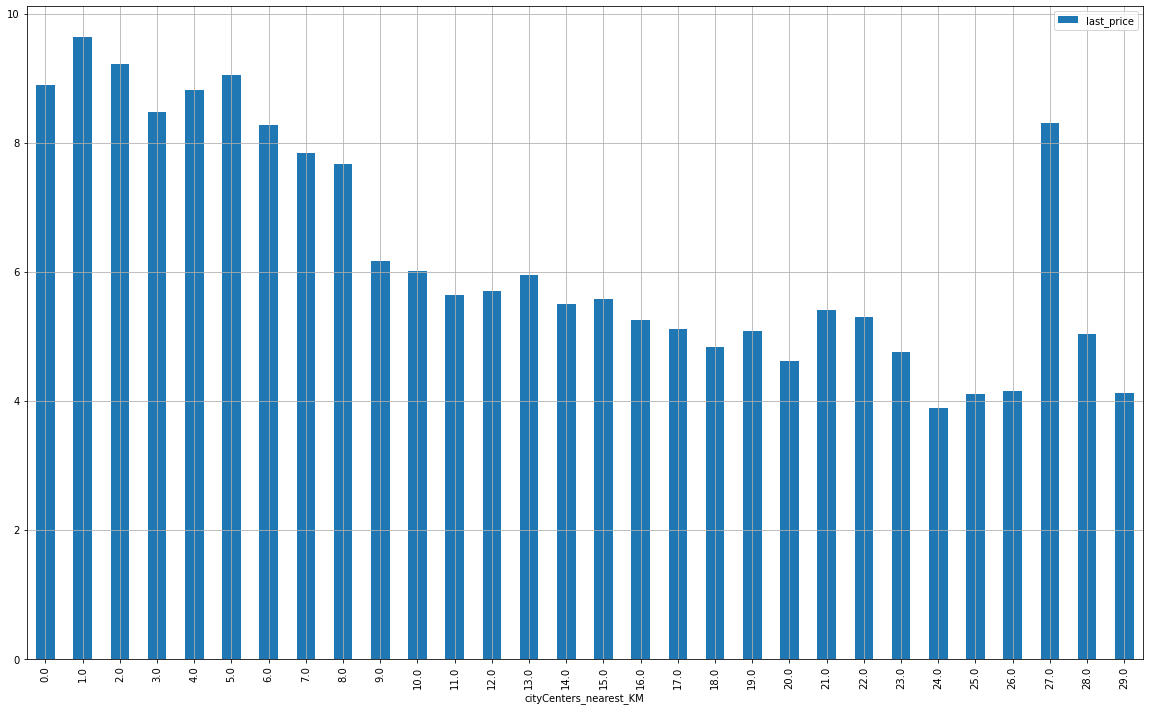

In [97]:
data.query('locality_name_2 == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_KM',values='last_price').plot(grid=True,figsize=(20,12),kind='bar')

In [98]:
data.query('locality_name_2 == "Санкт-Петербург" and cityCenters_nearest_KM==27')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_2,one_square_price,weekday_exposition,month_exposition,year_exposition,apartment_floor_type,cityCenters_nearest_KM
748,13,14.35,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,False,False,25.0,0.0,Санкт-Петербург,23888.0,27313.0,1.0,1496.0,0.0,NaN,128.0,Санкт-Петербург,193918.92,1,11,2017,другой,27.0
5961,6,2.25,32.0,2018-02-27,1,NaN,2.0,16.5,2,False,False,False,7.0,0.0,Санкт-Петербург,24006.0,27431.0,0.0,NaN,0.0,NaN,178.0,Санкт-Петербург,70312.50,1,2,2018,последний,27.0


**Как стоимость объектов зависит от расстояния до центра города - чем дальше, тем меньше стоимость. До 8 км средняя стоимость не ниже 8 млн.р. Далее идет постепенное снижение с небольшими пиковыми значениями на 21,22 км и  высокое пиковое занчение на 27 км**(связано с тем , что на этом показателе всего 2 объявления на 14 350 000(нетипичное значение) и 2 250 000 руб. и в среднем  8 300 000 руб)

### Общий вывод

Характеристики для составления общего вывода 

In [99]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_price,weekday_exposition,month_exposition,year_exposition,cityCenters_nearest_KM
count,21248.000000,21248.000000,21248.000000,21248.000000,12918.000000,21248.000000,21248.000000,21248.000000,21248.000000,21248.000000,15978.000000,15995.000000,15996.000000,6759.000000,15996.000000,7622.000000,18544.000000,21248.000000,21248.000000,21248.000000,21248.000000,15995.000000
mean,9.820595,5.259457,55.215905,1.973645,2.688296,10.845397,31.572757,5.932794,9.820353,0.599821,28444.649017,14057.856455,0.564829,465.518716,0.701175,533.463658,175.132496,94395.097426,2.569512,6.404273,2017.385495,14.053267
std,5.596344,2.949502,20.849506,0.882552,0.206214,6.548475,14.100529,4.879814,3.839091,0.959437,12358.052635,7039.119320,0.764636,248.248510,0.887185,276.661357,213.029189,32131.245709,1.789682,3.489438,1.025661,7.050199
min,0.000000,0.520000,20.670000,1.000000,2.500000,2.000000,10.080000,1.000000,4.009391,0.000000,0.000000,287.000000,0.000000,1.000000,0.000000,13.000000,1.000000,10185.190000,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000,40.000000,1.000000,2.500000,5.000000,18.700000,2.000000,7.000000,0.000000,18021.500000,10207.500000,0.000000,292.000000,0.000000,319.000000,44.000000,75737.400000,1.000000,3.000000,2017.000000,10.000000
50%,9.000000,4.500000,50.600000,2.000000,2.620000,9.000000,29.994525,4.000000,9.000000,0.000000,26876.500000,13302.000000,0.000000,456.000000,0.000000,522.000000,92.000000,94017.090000,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.300000,65.900000,3.000000,2.750000,16.000000,40.200000,8.000000,11.350000,1.000000,37091.000000,16268.000000,1.000000,610.000000,1.000000,745.000000,222.000000,111737.355000,4.000000,10.000000,2018.000000,16.000000
max,42.000000,20.000000,200.000000,4.000000,3.500000,27.000000,118.500000,27.000000,30.000000,5.000000,61748.000000,35892.000000,3.000000,1514.000000,3.000000,1344.000000,1580.000000,387096.770000,6.000000,12.000000,2019.000000,36.000000



**Таким образом , средняя стоимость объектов 5 259 тыс. руб.**


```1)``` ***Наблюдения по  изученным параметрам:***

**общая площадь**: 

Медиана: было 52 м /стало 50.6 м (до и после удаления редких и выбивающихся значений)

Пик(и): 40-50 м. 

Тип распределения:распределение Пуассона

редкие и выбивающиеся значения - свыше 200 кв. м. и менее 20 кв.м.;

Обычные показатели:40-65.9 кв.м.;


**жилая площадь**: 

Медиана:было 30 м /стало 29.99

Пик(и): 2 пика. Первый(большой): 16.5 - 20.5 м.; второй(меньший) :30-35 м. Можно объяснить, что первый пик для однокомнатной квартиры, а второй для квартир для квартир с комнатиами от 2 и более. 

Тип распределения:Гипергеометрическое распределение

редкие и выбивающиеся значения - менее 10 кв. м. и свыше 120 кв. м. ;

Обычные показатели:18.7-40.2 кв. м. ;


**площадь кухни**: 

Медиана: было 9 м /стало 9 м

Пик(и):  6 - 10,5 м

Тип распределения: распределение Пуассона

редкие и выбивающиеся значения - менее 4 кв. м. и свыше 30 кв. м.;

Сдвиг графиков с площадьми влево можно объяснить большим количеством объектов с 1 или 2 комнатами.

Обычные показатели:7-11.35 кв. м.;


**цена объекта**: 

Медиана: было 4.646 тыс. руб. /4 500 тыс. руб

Пик(и): 3.500 - 4.500 тыс руб.

Тип распределения:распределение Пуассона

редкие и выбивающиеся значения - менее 500 тыс.руб. и свыше 20 000 тыс.руб.;

Обычные показатели:3 400 - 6 300 тыс.руб.;


**количество комнат**: 

Медиана: было 2 ком. /стало 2 ком.

Пик(и):1 и 2 комнаты (примерно одинаковые) 

Тип распределения:распределение Пуассона

редкие и выбивающиеся значения - менее 1 комнаты и свыше 5 комнат;

Обычные показатели: 1 - 3 комнат ;


**высота потолков**: 

Медиана:было 2.65 м. /стало 2.62 м

Пик(и): 2.5-3.0 м.

Тип распределения:распределение Пуассона

редкие и выбивающиеся значения - менее 2.50 м.  и свыше 3.50 м;

Обычные показатели: 2.5 -2.75 м;


**тип этажа квартиры («первый», «последний», «другой»)**:  


редкие и выбивающиеся значения отсутствуют. В основном жилье находится между первым и последним этажами.;


**общее количество этажей в доме**: 

Медиана: было 9 эт. / стало 9 эт.

Пик(и): 5,9, 16, 25. Связано с особенностью строительства большинства современных домов. В основном дома строят(строили) с подобной этажностью.

Тип распределения:Гипергеометрическое распределение

редкие и выбивающиеся значения - менее 2 этажей  и свыше 27 этажей;

Обычные показатели:5 -16  этажей;


**расстояние до центра города в метрах**: 

Медиана: было 13 096.5 м. /стало 13 302 м.

Пик(и): 2 пика. Первый -  5 000 м , второй - 11 000-15 000 м.  Связано с большой долей(более 65%) объявлений из Санкт-Петербурга. Соответственно, второй пик характерен для Санкт-Петербурга, а  первый для остальных населенных пунктов. Также большое расстояние до центра связано с тем, что основное количество пропусков в столбце - это населенные пункты помимо Санкт-Петербурга  и в основном  в этот столбец вошли данные по Санкт-Петербургу(около 87%).

Тип распределения:Гипергеометрическое распределение

редкие и выбивающиеся значения -  свыше 36 000 м.;

Обычные показатели: 10 207.5 - 16 268 м.;


**расстояние до ближайшего парка** 

Медиана:было 455 м. / стало 456 м.

Пик(и):500 м. Небольшое расстояние до парка можно объяснить большим количеством пропусков, в частности большим количеством пропусков в больших городах, в том числе Санкт-Петербурге(больше половины объявлений с пропусками в этом столбце).

Тип распределения:распределение Пуассона

редкие и выбивающиеся значения-свыше 1 550 м.

Обычные показатели: 292- 610 м.

**Таким образом, объект с обычными параметрами - это объект с общая площадь 40-65.9 кв.м., жилой 18.7-40.2 кв. м., с площадью кухни 7-11.35 кв. м., ценой 3 400 - 6 300 тыс.руб.,количеством комнат 1 - 3 комнат,высотой потолков 2.5 -2.75 ,находится между первым и последним этажами.**

Из-за большого количества пропуском обычные показатели расстояние до центра города в метрах и расстояние до ближайшего парка не полностью отображают действительность: расстояние до центра города в метрах - 10 207.5 - 16 268 м.(завышен), а расстояние до ближайшего парка 292- 610 м (занижен).




```2)``` ***обычно  продажа занимает - 44-222 дня.***

**продажи можно считать быстрыми - до 44 дней,**

**необычно долгими - свыше 222 дней.**





```3)``` ***Какие факторы больше всего влияют на общую (полную) стоимость объекта?***


1.Стоимость объекта зависит от **площади**. **Чем больше площадь , тем выше стоимость.**

Наибольшая зависимость от **общей площади - корреляция 0.75.**

**Корреляция от жилой площади - 0.64.**

Наименьшая - **от площади кухни -корреляция 0.57.**

Есть несколько нетипичных значений, когда при небольшой стоимости большая площадь и наоборот. Но это скорее единичные случаи.


2.Есть стоимости объекта от **типа этажа, на котором расположена квартира (первый, последний, другой)**

**Наименьшая стоимость - первого этажа.**

**Наибольшая - другие(не первый и не последний)**


3.Есть прямая зависимость **количества комнат** от стоимости квартиры. **Чем больше количество комнат, тем выше стоимость.**


4.**Даты размещения (день недели, месяц, год)**

**День недели** - зависимости почти нет. Немного больше стоимость объектов, которые были размещены в первой половине недели.

**Месяц**

Есть небольшая зависимость. Небольшой рост в апреле и спад в июне(можно объяснить периодом отпусков).

**Год**

Есть зависимость. Сильный спад с 2014 по 2016. С 2017 по 2019 постепенны рост.


**Таким образом, стоимость больше всего зависит от площадей, количества комнат, типа этажа.**




```4)``` **БOльшая часть объяслений была по объектам из г. Санкт- Петербург. 13 990 из 21 248 - 66%.**

**Наибольшая средняя цена квадратного метра также  в Санкт-Петербурге 108 091.51 руб./ кв.м.** 

При этом в 10 населённых пунктах с наибольшим числом объявлений сосредоточено  17 303 объявлений , т.е. 80,7%



```5)``` **Как стоимость объектов зависит от расстояния до центра города - чем дальше, тем меньше стоимость. До 8 км средняя стоимость не ниже 8 млн.р. Далее идет постепенное снижение.**




Сами предоставленные данные для анализа имеют ***множество пропусков***. С учётом того, что расстояние до центра, аэропорта и других объектов, а также количество парков и водоёмов — эти данные автоматически получены из геосервисов, можно сделать вывод , что ```есть проблемы с получением и обработкой этих данных```. Те пропуски в данных, которые заполняет сам пользователь(например, по поводу типа апартаментов), возможно связаны с интерфейсом страницы , на которой вносятся данные. 

```Рекомендовано проверить корректность и полноту получаемых данных из геосервисов и простату понимания запрашиваемых у пользователя данных.```  

```Для анализа рекомендовано дополнительно довнести данные по по параметрам -  год постройки объекта, площадь населенных пунктов, является ли объявление еще открытым или уже снято``` 

```Убрать или сделать обязательным is_apartment. Обязательно дозаполнить данные по  столбцам, в  особенности  cityCenters_nearest.```